### Project Title: Telecommunication Customer Churn Prediction

### Introduction: 
Customer churn, also knows as customer turnover or customer defection. The situation refers to loss of customers. Churn is expensive and it cost more to acquiring a new customer than it does to retain a current one. For this very reason, there is the motivation to predict it before it happens.

A giant Telecommunication company in Senegal wants to predict which customers are at high risk of leaving the company or canceling a subscription to a service, based on their behavior towards key products of the company.

In this project, Machine Learning Models will be used to predict the future churn rate for the company. This will help to focus attention on customer retention programs to avert or minimize future churn

### Hypothesis

1. Customers with longer tenure are less likely to churn than those with short tenure.

2. Customers with lesser income are likely to churn than those who have higher

3. Customers are more likely to switch to a network that offer better call plan to call other networks.

4. Customers who patronize a particular plan or service are most likely to churn. 

### Business Questions:
Here are seven potential business questions that can be answered using the telecom churn data:

1. What is the overall churn rate for the telecom company during the observed period?

This question aims to provide an understanding of the churn rate as a baseline for further analysis and decision-making.

2. Are there any specific regions or geographic areas with a higher churn rate compared to others?

By analyzing churn rates across different regions, the telecom company can identify areas that require targeted retention strategies or improved service quality.

3. Do customers who have been with the network for a longer tenure exhibit lower churn rates?

This question explores the relationship between customer tenure and churn rate, helping the company understand the impact of customer loyalty on churn.

4. Is there a correlation between top-up amount (MONTANT) and churn rate?

This question investigates whether customers with higher or lower top-up amounts are more likely to churn, providing insights into the relationship between spending behavior and churn.

5. Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn?

This question examines the influence of top pack usage on churn rate, helping the company identify which packs contribute to customer retention and can be promoted further.

6. Are customers who have a higher number of on-net calls (ON_NET) less likely to churn?

This question seeks help to help the company to assess how ON_NET or inter expresso calls contribute to the churn rate of the company.

7. Do customers who regularly refill their accounts (FREQUENCE_RECH) have lower churn rates compared to those who refill less frequently?

- These questions can provide valuable insights into churn patterns, customer behavior, and factors contributing to customer retention. Analyzing the telecom churn data in relation to these questions can help the company make informed decisions and develop effective strategies to reduce churn, improve customer satisfaction, and enhance business performance.

### Import Libraries

In [93]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [55]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")


df = train

## Exploratory Data Analysis: EDA
Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation

### Checking dataframe for the train dataset

In [56]:
#Display of dataframe
df.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
5,b91a81e590d0dd029d99002d4226b9ca2cdf3cbc,DAKAR,E 6-9 month,2000.0,2.0,2000.0,667.0,3.0,4206.0,246.0,709.0,10.0,NaN,NaN,NO,62,"On-net 500=4000,10d",1.0,0
6,42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2,DAKAR,K > 24 month,3000.0,1.0,3000.0,1000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,"Data:3000F=10GB,30d",1.0,0
7,b1df76427c6ec716f3c749f46c1fcd8d0c46f21c,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0
8,f19538e205b79623db61ac663f50d567cd863aab,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
9,0ebed6d0a2ddb911189a4ce9473bf9dfa6bdaadc,THIES,K > 24 month,6500.0,13.0,6499.0,2166.0,14.0,1.0,97.0,81.0,12.0,0.0,NaN,NO,61,All-net 500F=2000F;5d,12.0,0


### Checking Columns and Rows of the data

In [57]:
# Check dataset dimension 
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1077024
Number of columns: 19


The train dataset had **19 columns** and **1077024 columns**

### Checking Datatypes of each Column

In [58]:
# print data types
print(df.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


From the above, each column is revealed to have it required datatypes. This means further analysis can be performed and the dataset

### Dropping the USER_ID Column

In [59]:
# Drop the User_id column
df.drop('user_id', axis=1, inplace=True)

### Checking occurrences for value counts  in selectd columns¶
It helps to understand the distribution of values and identify the most common or frequent values in that column.

In [60]:
df['TENURE'].value_counts()

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64

In [61]:
df['REGULARITY'].value_counts()

1     97779
62    83524
2     59172
3     43102
4     34241
      ...  
34     9731
37     9666
33     9653
35     9649
36     9573
Name: REGULARITY, Length: 62, dtype: int64

The 'REGULARITY' column represents the number of months a customer has been using a service, running df.value_counts() will give you a count of how many customers have been using the service for each specific number of months

### Perform descriptive statistics on the dataset

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


The function **descripe().T** was used to disploy our discriptive statistics under a simple table to ease undertanding and view

### Definition of Variables

**REGION**: The location of each client

**TENURE**: Duration with the network

**MONTANT**: Top-Up Amount

**FREQUENCE_RECH**: the number of times a customer refilled

**REVENUE**: Monthly income of each client

**ARPU_SEGMENT**: income over 90 days / 3

**FREQUENCE**: number of times the client has made an income.

**DATA_VOLUME**: number of connections

**ON_NET**: inter expresso call

**ORANGE**: calls to orange

**TIGO**: calls to tigo

**ZONE1**: calls to zone1

**ZONE2**: calls to zone2

**MRG**: a client who is going

**REGULARITY**: number of times the client is active for 90 days

**TOP_PACK**: the most active packs

**FREQ_TOP_PACK**: number of times the client has activated the top pack packages

**CHURN**: variable to predict - Target

### Check Unique Values of sampled columns

In [63]:
# unique elements of MONTANT column
df.MONTANT.unique()

array([20000.,    nan,  7900., ..., 35475.,  6216.,  8949.])

In [64]:
# unique elements of REVENUE column
df.REVENUE.unique()

array([21602.,    nan,  7896., ..., 37609., 21676., 26489.])

In [65]:
# unique elements in TOP_PACK column
df.TOP_PACK.unique()

array(['On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F

### Univariate Analysis
This sction visualizes each individual feature in the dataset.

### KDEs Plot for all columns

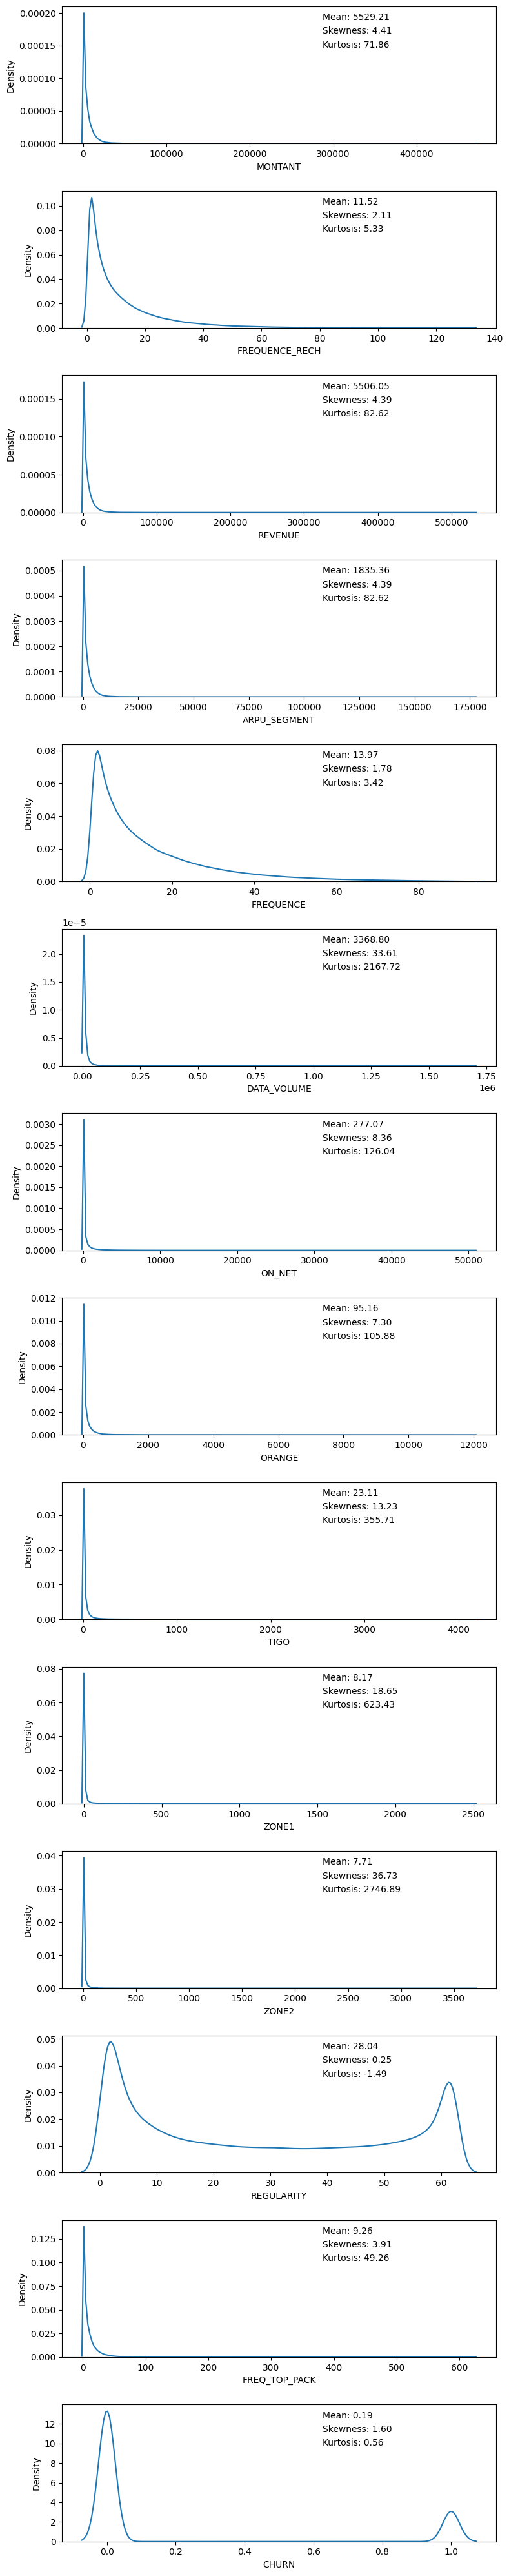

In [66]:
# Extracting all numerical variables 
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

The KDE plot ploted columns with **float** and **int** datatypes

####  Count Plot on Churn

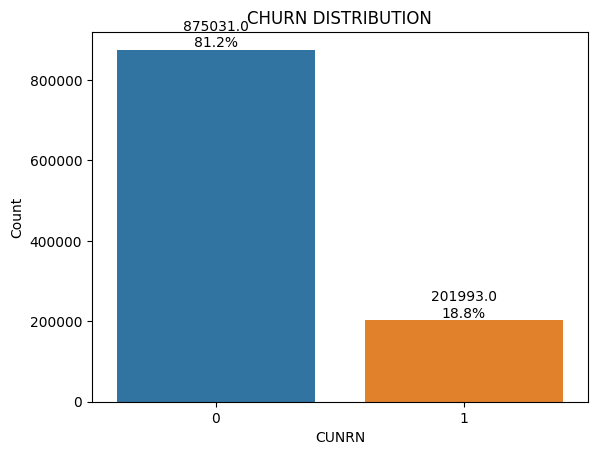

In [67]:
# Count plot for "CHURN"
sns.countplot(data=df, x='CHURN')

# Set labels
plt.xlabel('CUNRN')
plt.ylabel('Count')

# Set title
plt.title('CHURN DISTRIBUTION')

# Calculate percentage distribution
total = len(df['CHURN'])
percentages = df['CHURN'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


**Interpretation**

The count plot above represents the distribution of churned and non-churned customers in the dataset.
- The blue bars represent the count of non-churned customers, 
- The orange bars represent the count of churned customers.
- Statisctially, 87503 (81.2%) were Non-churned customers whiles 20199(18.8%) customers chured 

**Analysis**
- The majority of customers in the dataset are non-churned with 81.2%
- This suggests that the dataset is imbalanced, with a larger proportion of non-churned customers.
- It is important to consider this class imbalance when interpreting the results of any predictive modeling or analysis.



 ### Horizontal Bargraph on distribution of the TOP_PACK

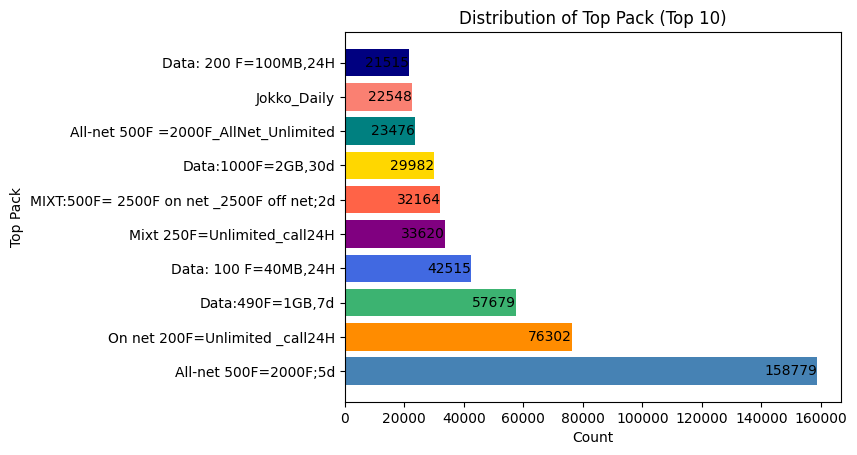

In [68]:
# Barplot to show the distribution of the TOP_PACK
top_pack_counts = df['TOP_PACK'].value_counts().head(10)
colors = ['steelblue', 'darkorange', 'mediumseagreen', 'royalblue', 'purple', 'tomato', 'gold', 'teal', 'salmon', 'navy']

plt.barh(top_pack_counts.index, top_pack_counts.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Top Pack')
plt.title('Distribution of Top Pack (Top 10)')

# Add data labels
for i, count in enumerate(top_pack_counts.values):
    plt.text(count, i, str(count), ha='right', va='center')

plt.show()


The bar plot the y-axis displays the names of the top packs, while the x-axis represents the count of customers.

**Analysis**
- The bar plot provides an overview of the popularity and usage of different top packs among the customers.

**Interpretation**
- The bar plot indicates that **All-net 500F:5d** has the highest count among the top 10 most frequently activated top packs, followed by **On net 200F=Unlimited_call24H** and **Data:490F=1GB,7d**
- This suggests that these top packs are popular among customers and have a significant user base.


### Bar plot on Region Distribution 

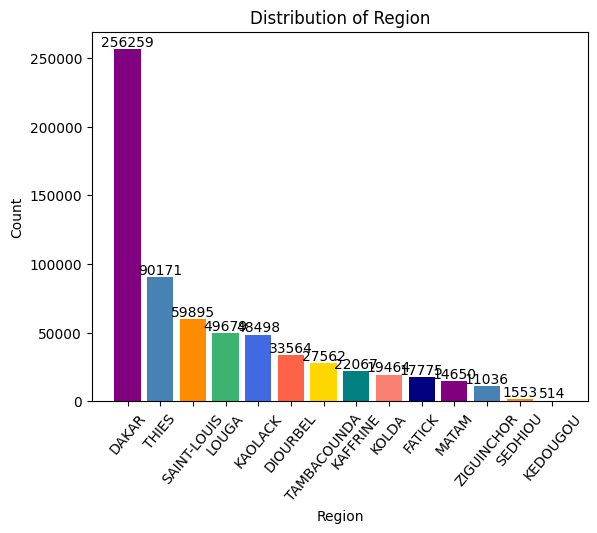

In [69]:
## Retrieve the region column from datafrome, using value count to aid numerical understanding  
region_counts = df['REGION'].value_counts()
colors = ['purple', 'steelblue', 'darkorange', 'mediumseagreen', 'royalblue', 'tomato', 'gold', 'teal', 'salmon', 'navy']

plt.bar(region_counts.index, region_counts.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')
plt.xticks(rotation=50)

# Add data labels
for i, count in enumerate(region_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


From the bar plot, **Darkar** is the region with the highest distribution totally 256259 followed by **Thies** and **Saint-Louis**

### Histograme on Frequency of Recharge Distribution

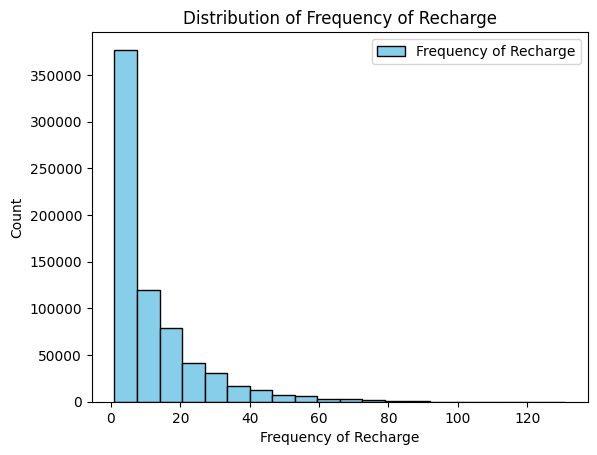

In [70]:
plt.hist(df['FREQUENCE_RECH'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Frequency of Recharge')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Recharge')

# Add legend
plt.legend(['Frequency of Recharge'])
plt.show()


The histrogram reveals that frequency of recharge was above 350000.

### violin plot pn Distribution of revenue 

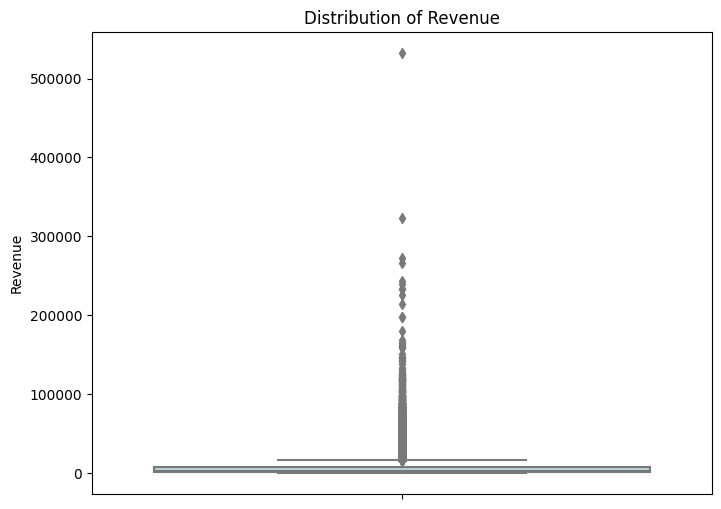

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='REVENUE', color='lightblue')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue')

plt.show()


The violin plot above represents the distribution of the "REVENUE" variable. 
- The width of the violin at a specific value indicates the density or frequency of data points at that value. The wider section indicates a higher concentration of data points, while a narrower section indicates a lower concentration.
- In this plot, it is clearly seen that the majority of the revenue values are concentrated around the middle section of the violin. 
- This plot helps us understand the distribution of revenue and provides insights into its variation, central tendency, and any potential outliers present in the dataset.

### Histogram on Regularity Distribution

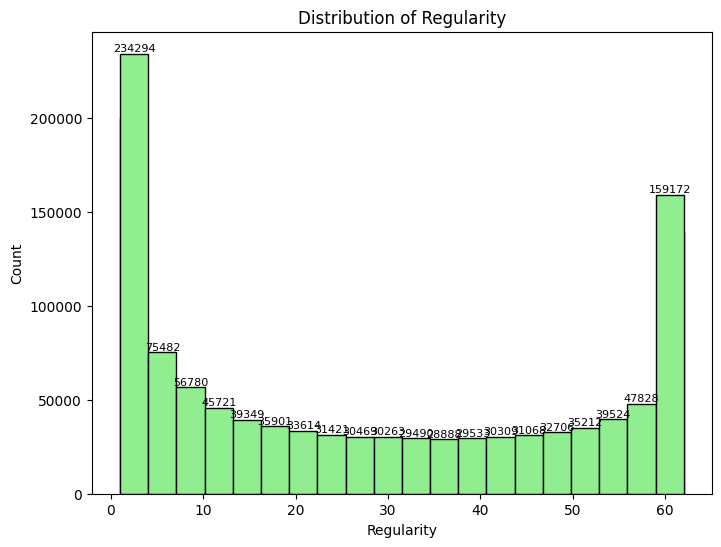

In [72]:
plt.figure(figsize=(8, 6))
plt.hist(df['REGULARITY'], bins=30, color='lightgreen', edgecolor='black')

plt.xlabel('Regularity')
plt.ylabel('Count')
plt.title('Distribution of Regularity')

# Add labels to each bar
counts, bins, _ = plt.hist(df['REGULARITY'], bins=20, color='lightgreen', edgecolor='black')
for count, bin in zip(counts, bins):
    if count > 0:
        plt.text(bin + (bins[1] - bins[0]) / 2, count + 10, str(int(count)), ha='center', va='bottom', fontsize=8, color='black')

plt.show()


The histogram visualizes the distribution of the 'REGULARITY' variable in the 'df' DataFrame. The histogram has 30 bins and is colored light green with black edges. The x-axis represents the 'Regularity' values, and the y-axis represents the count of occurrences. Each bar in the histogram is labeled with its respective count.

### Bivariate Analysis

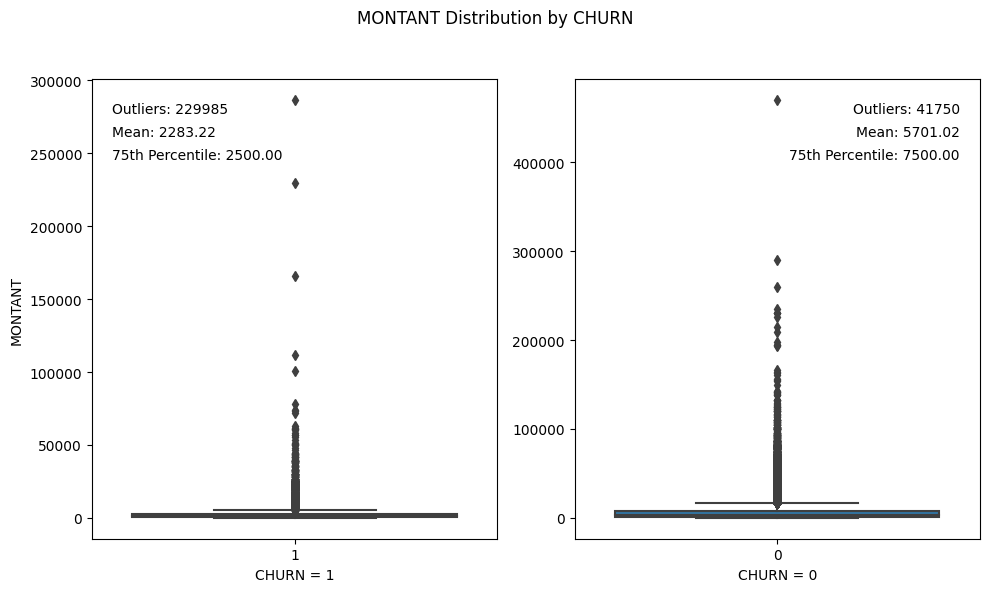

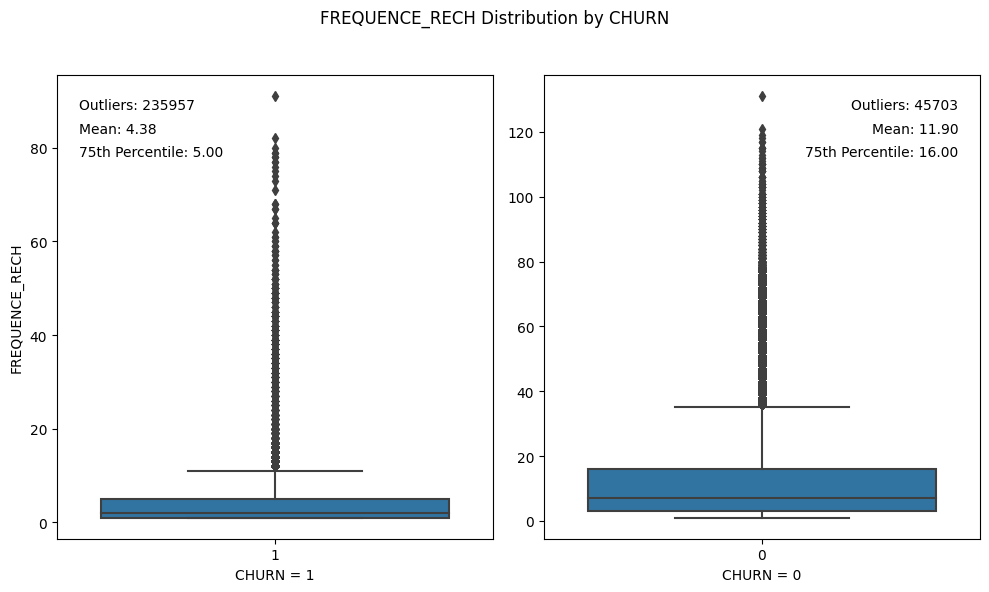

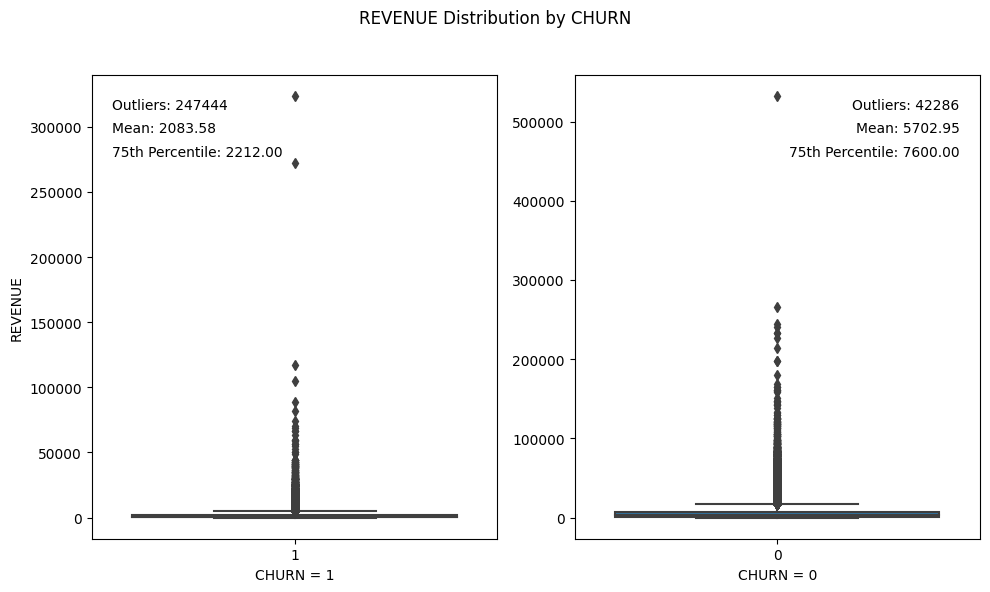

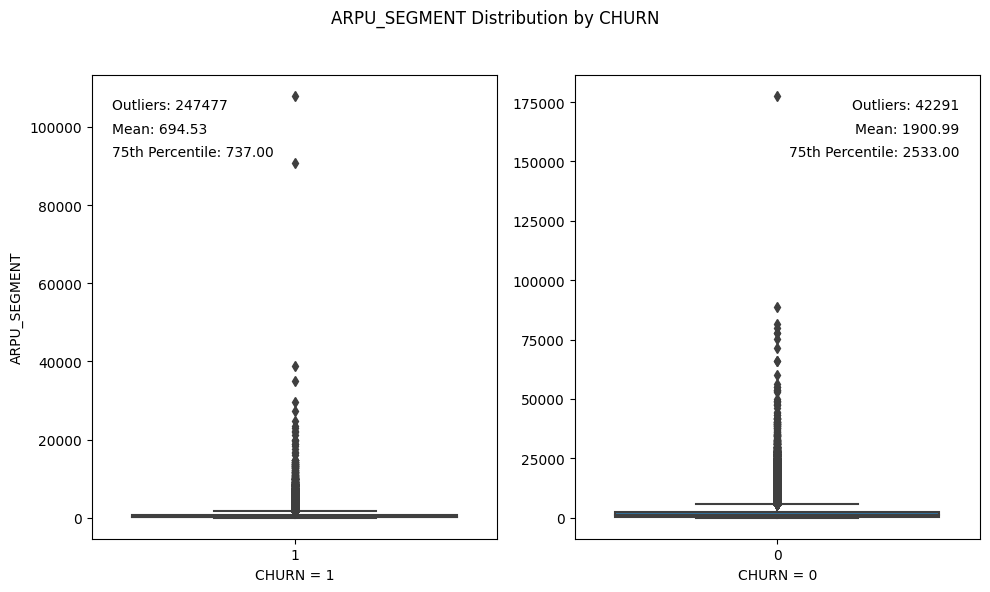

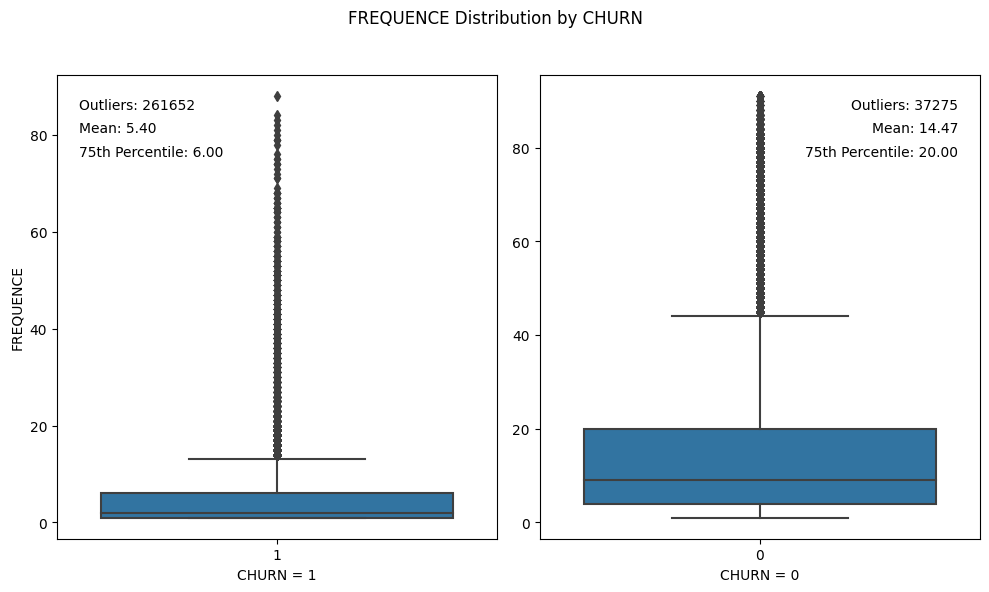

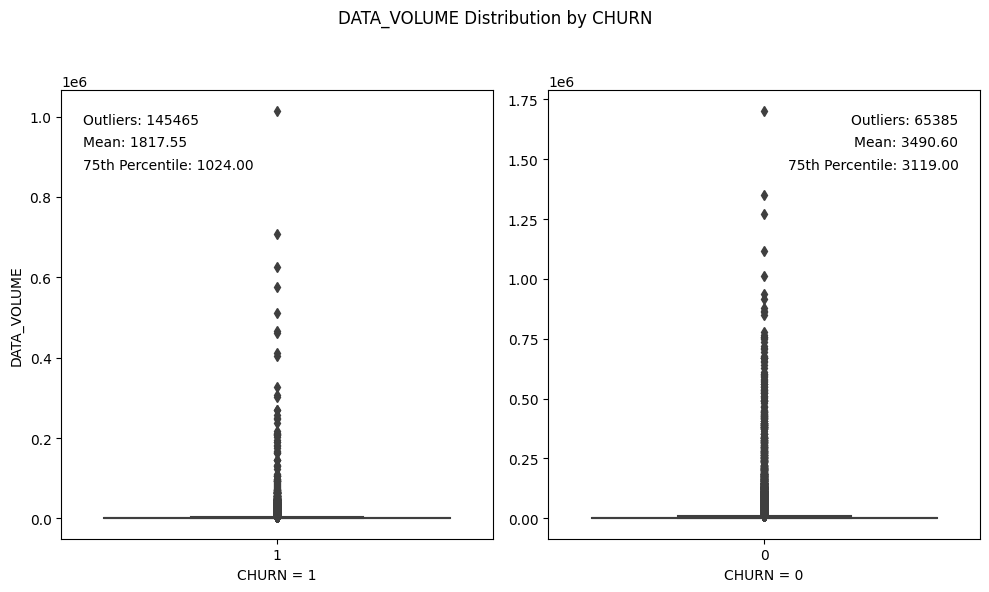

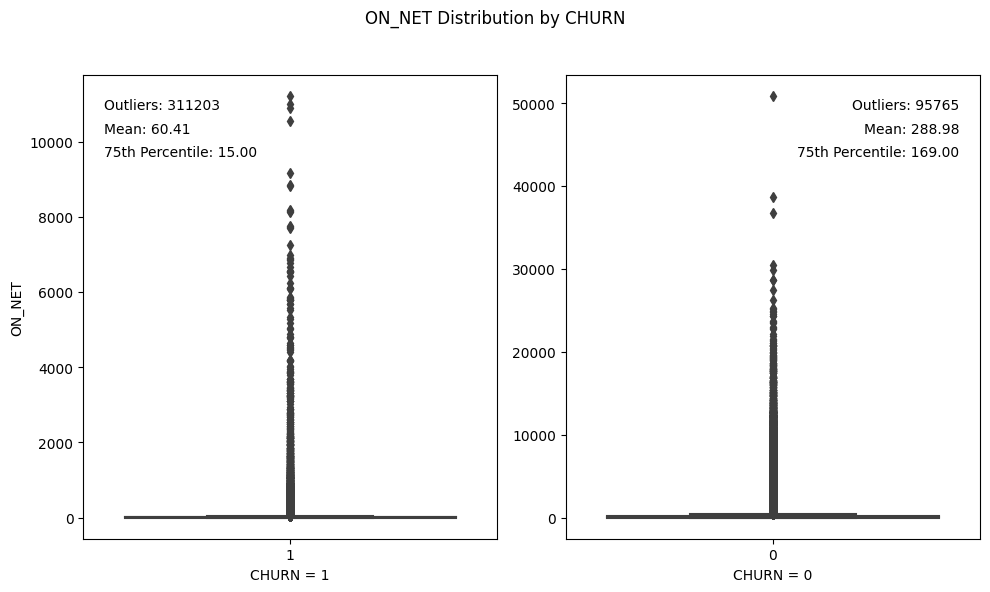

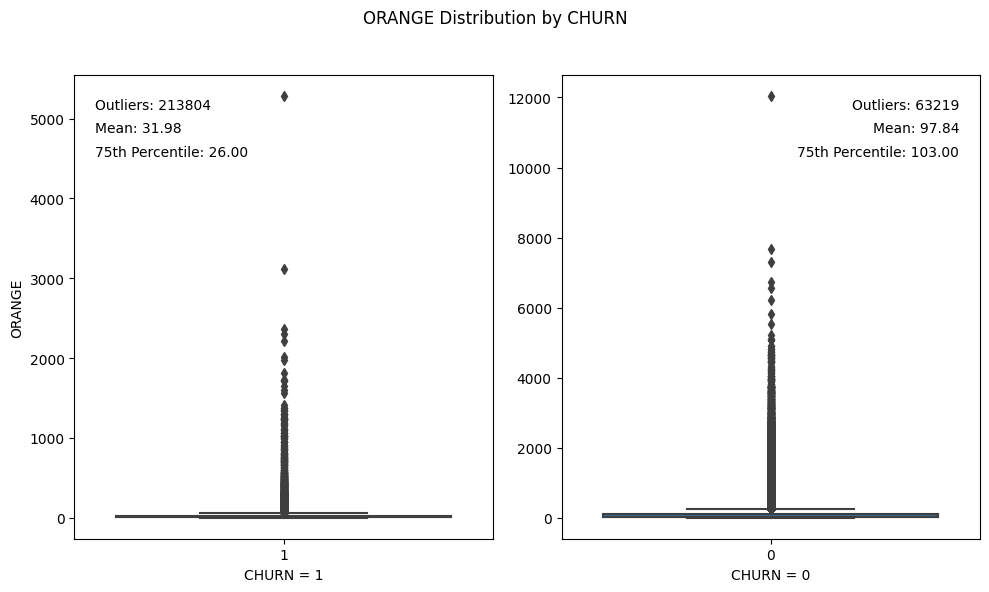

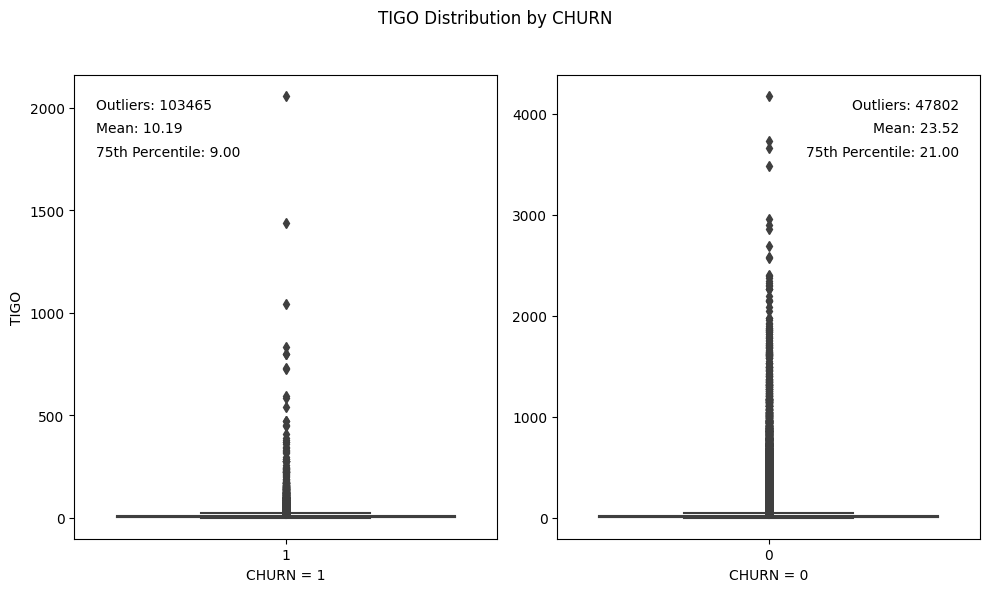

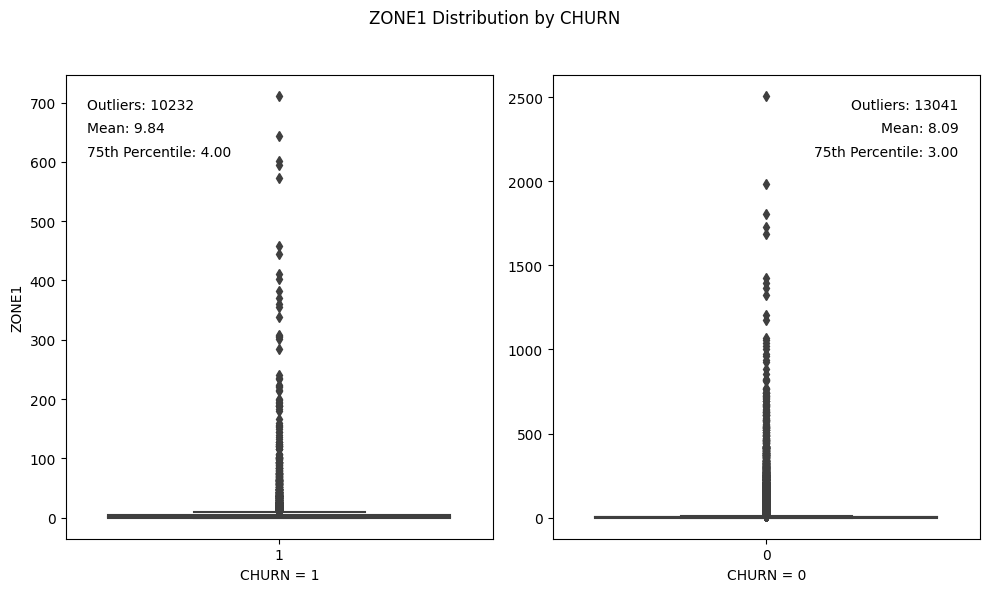

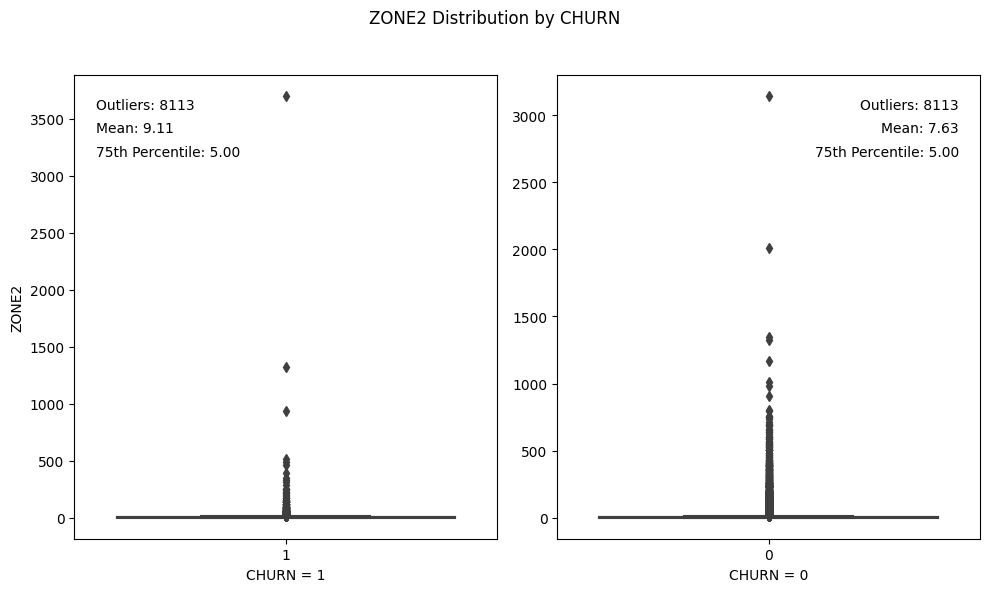

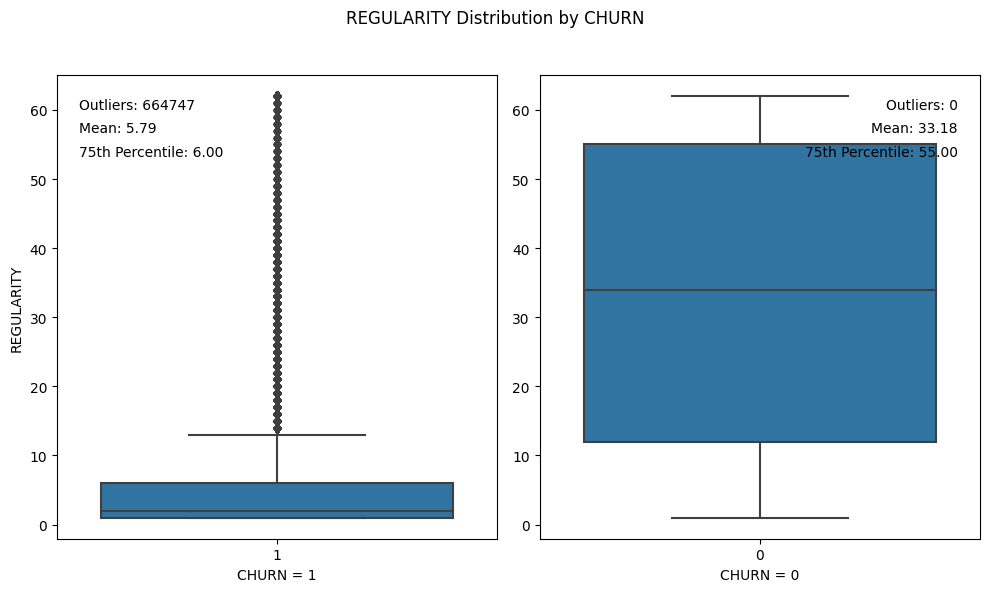

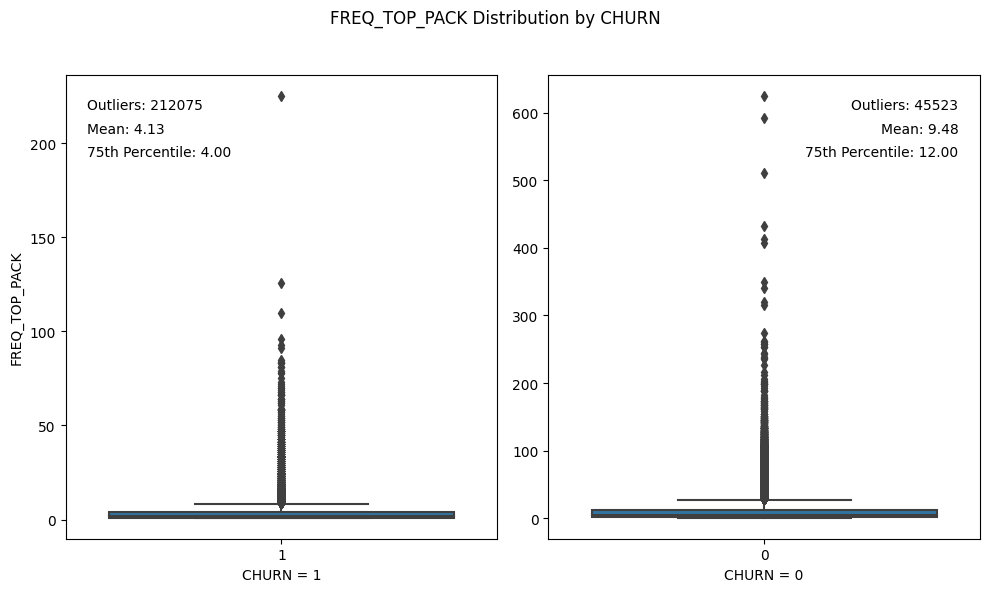

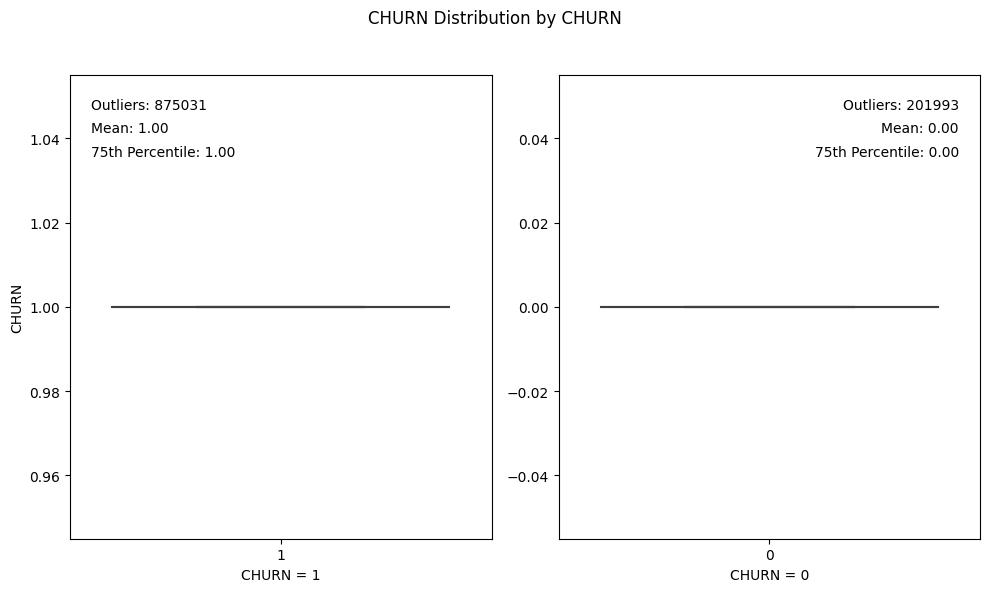

In [73]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[df['CHURN'] == 1], x='CHURN', y=col)
    q75_1 = df[df['CHURN'] == 1][col].quantile(0.75)
    q25_1 = df[df['CHURN'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = df[(df[col] < q25_1 - 1.5 * iqr_1) | (df[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {df[df['CHURN'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)
    
    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['CHURN'] == 0], x='CHURN', y=col)
    q75_0 = df[df['CHURN'] == 0][col].quantile(0.75)
    q25_0 = df[df['CHURN'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = df[(df[col] < q25_0 - 1.5 * iqr_0) | (df[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {df[df['CHURN'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')
    
    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Scatter plot on Frequency of Recharge vs. Revenue

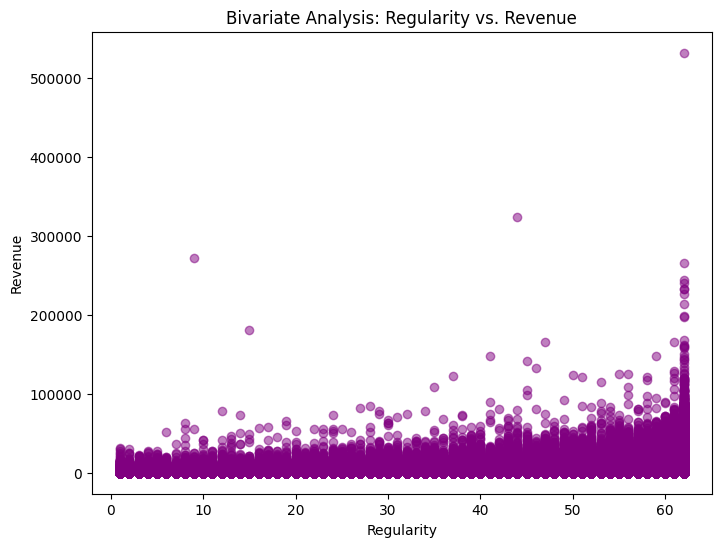

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(df['REGULARITY'], df['REVENUE'], color='purple', alpha=0.5)

plt.xlabel('Regularity')
plt.ylabel('Revenue')
plt.title('Bivariate Analysis: Regularity vs. Revenue')

plt.show()


- From the plot, we can see that there is no strong linear relationship between **Regularity** and **Revenue** 
- The data points are scattered throughout the plot, indicating that the two variables do not have a clear and consistent pattern of association.



### Line plot on relationship between ORANGE and TIGO 

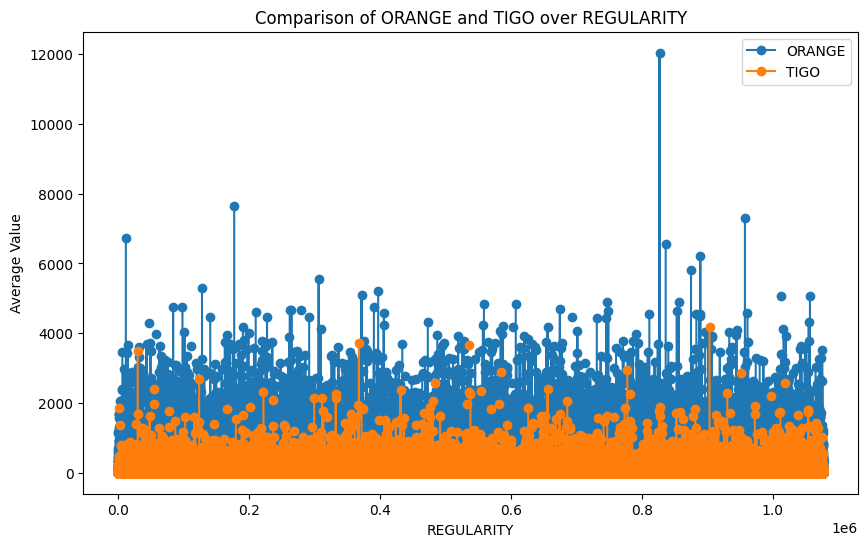

In [75]:
orange_tigo_data = df[['ORANGE', 'TIGO']]
grouped_data = orange_tigo_data.groupby('ORANGE').mean()


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ORANGE'], marker='o', label='ORANGE')
plt.plot(df.index, df['TIGO'], marker='o', label='TIGO')

plt.xlabel('REGULARITY')
plt.ylabel('Average Value')
plt.title('Comparison of ORANGE and TIGO over REGULARITY')
plt.legend()

plt.show()


The line plot compares the average values of the **ORANGE** and **TIGO** variables. 
- The x-axis represents the values of the "ORANGE" variable, while the y-axis represents the average value of the "TIGO" variable. The plot allows us to observe the relationship between these two variables.

#### Interpretation of the plot:

- As the values of the **ORANGE** variable increase, the average value of the **TIGO** variable also tends to increase. This indicates a positive correlation between the two variables.
- The plot shows the overall trend and pattern between the two variables, allowing us to identify any potential outliers or deviations from the general trend.







### Scatter plot of MONTANT and REVENUE

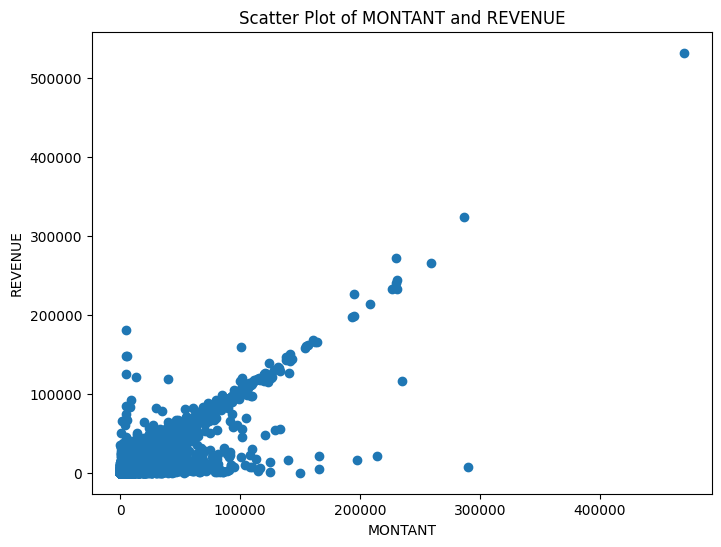

In [23]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a scatter plot using 'MONTANT' as the x-axis and 'REVENUE' as the y-axis
plt.scatter(df['MONTANT'], df['REVENUE'])

# Add labels to the x-axis and y-axis
plt.xlabel('MONTANT')
plt.ylabel('REVENUE')

# Add a title to the plot
plt.title('Scatter Plot of MONTANT and REVENUE')

# Display the plot
plt.show()


The scatter plot above visualizes the relationship between the **MONTANT** (amount) and **REVENUE** variables. 

- The x-axis represents the  **MONTANT** values, which indicate the amount spent by customers.
- The y-axis represents the **REVENUE** values, which indicate the revenue generated.
- The scatter plot shows the distribution of data points across the range of **MONTANT**  and **REVENUE** values.
- The plot indicates a positive correlation between "MONTANT" and "REVENUE," as higher values of "MONTANT" tend to correspond to higher values of **REVENUE** 
- However, there is some variation in the relationship, as evident by the spread of data points. This suggests that other factors may also influence the **REVENUE** apart from just the MONTANT** value.


### Line plot illustrating the average REVENUE across different categories of TENURE

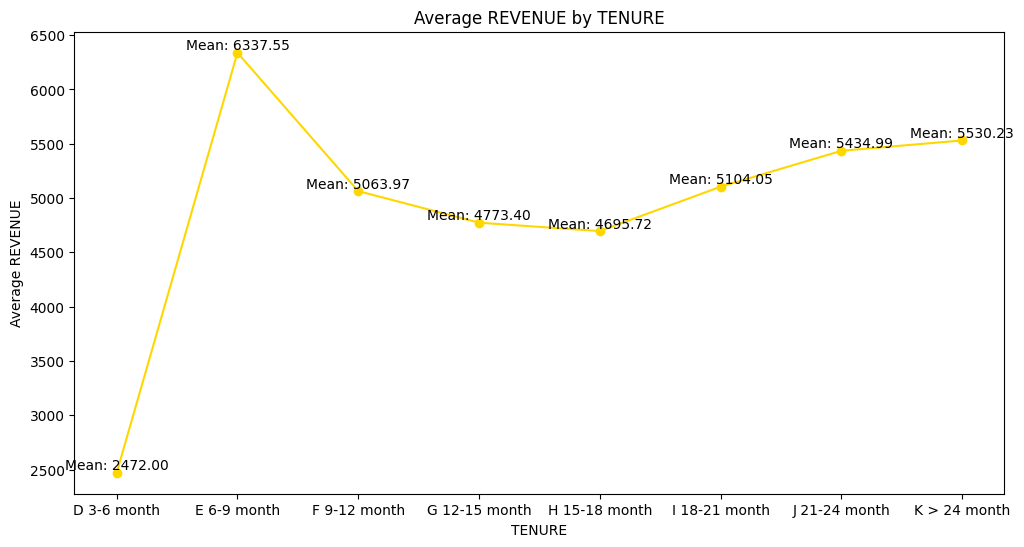

In [94]:
grouped_data = df.groupby('TENURE').mean()

plt.figure(figsize=(12, 6))

# Plotting the line graph
plt.plot(grouped_data.index, grouped_data['REVENUE'], marker='o', color='gold')

# Adding labels and title
plt.xlabel('TENURE')
plt.ylabel('Average REVENUE')
plt.title('Average REVENUE by TENURE')

# Calculate statistics
revenue_mean = df.groupby('TENURE')['REVENUE'].mean()
revenue_median = df.groupby('TENURE')['REVENUE'].median()
revenue_q1 = df.groupby('TENURE')['REVENUE'].quantile(0.25)
revenue_q3 = df.groupby('TENURE')['REVENUE'].quantile(0.75)

# Print statistics
for tenure, mean, median, q1, q3 in zip(revenue_mean.index, revenue_mean, revenue_median, revenue_q1, revenue_q3):
    plt.text(tenure, mean, f"Mean: {mean:.2f}", ha='center', va='bottom', color='black')
    #plt.text(tenure, median, f"Median: {median:.2f}", ha='center', va='top', color='black')
    #plt.text(tenure, q1, f"Q1: {q1:.2f}", ha='center', va='top', color='black')
    #plt.text(tenure, q3, f"Q3: {q3:.2f}", ha='center', va='bottom', color='black')

plt.show()


From the plot, we can interpret the statistical visualization of the average revenue by tenure as explain below
- The line graph shows the trend of the average revenue for different tenure periods.
- The x-axis represents the tenure, which refers to the duration of the customer's subscription.
- The y-axis represents the average revenue.

**Interpreting the statistics**
- Mean: The text annotations labeled "Mean" indicate the average revenue value for each tenure period. It represents the central tendency of the revenue distribution at each point.
- Median: The annotations labeled "Median" represent the median revenue value for each tenure period. The median is the middle value that separates the higher and lower half of the revenue distribution.
- Q1: The annotations labeled "Q1" represent the first quartile or the 25th percentile of the revenue distribution for each tenure period. It indicates the value below which 25% of the data falls.
- Q3: The annotations labeled "Q3" represent the third quartile or the 75th percentile of the revenue distribution for each tenure period. It indicates the value below which 75% of the data falls.

The statistics provide insights into the central tendency and spread of the revenue data, allowing us to understand the average revenue trends and identify potential patterns or anomalies.


### Multivariate Analysis

### Heatman 

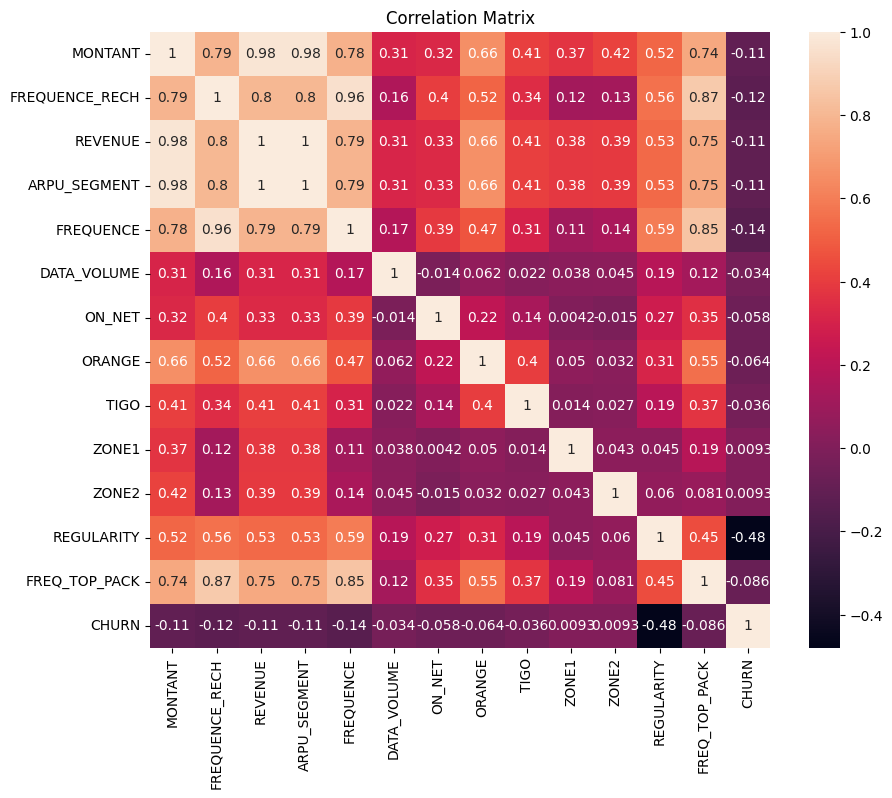

In [95]:
# Calculate correlation matrix
correl =df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Pie chart to visualize the distribution of categorical features in the dataset.

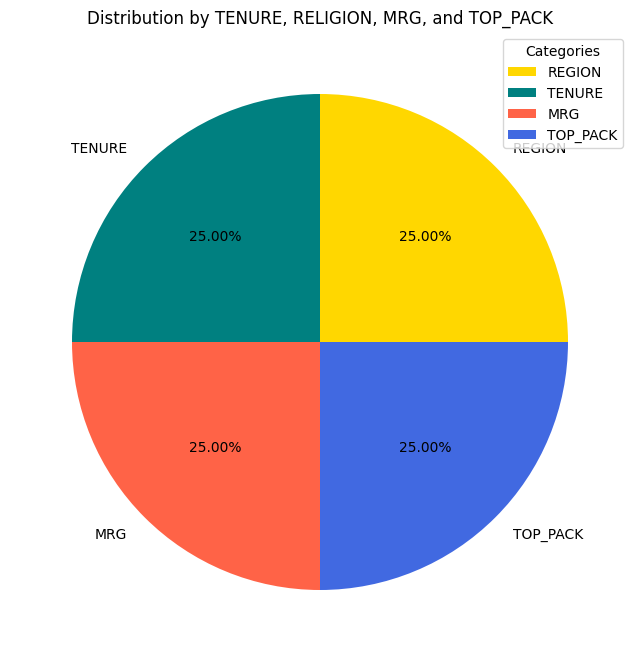

In [76]:
## cat_features in the dataset by filtering columns with object data type.
cat_features = df.select_dtypes(include='object').columns

to_plot = cat_features.value_counts() * 100

# creates a new figure with a specified size
plt.figure(figsize=(8, 10))

# plots the pie chart using the percentage distribution.
to_plot.plot(kind='pie', autopct='%1.2f%%', colors=['gold', 'teal', 'tomato', 'royalblue'])

# Sets the title for the pie chart
plt.title('Distribution by TENURE, RELIGION, MRG, and TOP_PACK')

# Removes the y-axis label.
plt.ylabel('')

# Adds a legend with the title 'Categories' to identify the different categorical features
plt.legend(title='Categories')

plt.show()

The pie chart above represents the distribution of categorical features TENURE, RELIGION, MRG, and TOP_PACK (top subscription package).

Here's the interpretation of the pie chart

1. Categories: Each colored section of the pie represents a different category within the categorical features (TENURE, RELIGION, MRG, and TOP_PACK)

2. Distribution: equal which indicates the dataset was not a skewed distribution 

The pie chart allows the team to quickly grasp the relative importance of different categories and gain initial insights into the dataset's composition.

### Boxplot on Revenue by Tenure

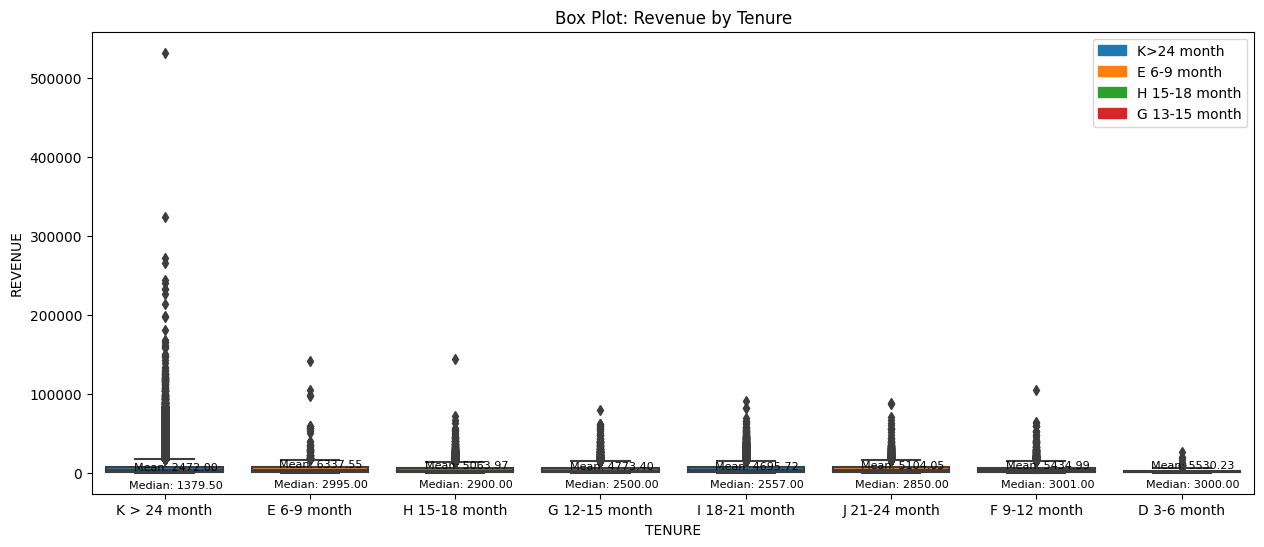

In [27]:
plt.figure(figsize=(15, 6))

# Set custom colors for the box plots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

sns.boxplot(data=df, x='TENURE', y='REVENUE', palette=colors)

plt.xlabel('TENURE')
plt.ylabel('REVENUE')
plt.title('Box Plot: Revenue by Tenure')

# Calculate statistics for each tenure group
statistics = df.groupby('TENURE')['REVENUE'].describe()
medians = df.groupby('TENURE')['REVENUE'].median()
means = df.groupby('TENURE')['REVENUE'].mean()

# Add statistical information to the plot
ax = plt.gca()
for i, label in enumerate(statistics.index):
    x = i % len(statistics.index)
    y_median = medians[label]
    ax.annotate(f'Median: {y_median:.2f}', (x, y_median), xytext=(8, -12), textcoords='offset points', ha='center', fontsize=8)
    y_mean = means[label]
    ax.annotate(f'Mean: {y_mean:.2f}', (x, y_mean), xytext=(8, 0), textcoords='offset points', ha='center', fontsize=8)

# Add legend for the box plot colors
legend_labels = ['K>24 month', 'E 6-9 month', 'H 15-18 month', 'G 13-15 month']
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in colors], labels=legend_labels)

plt.show()


- Each box corresponds to a specific tenure group 
- The vertical line inside the box represents the median revenue value for that group.
- The custom colors added to the box plots provide a visual distinction between the tenure groups, making it easier to differentiate them.

This plot and the added elements help analyze and compare the revenue distribution across different tenure groups, allowing for insights into any variations or trends among the groups. The statistical annotations provide specific numerical values for the median and mean, enhancing the understanding of the data.

### Pair plot with KDE

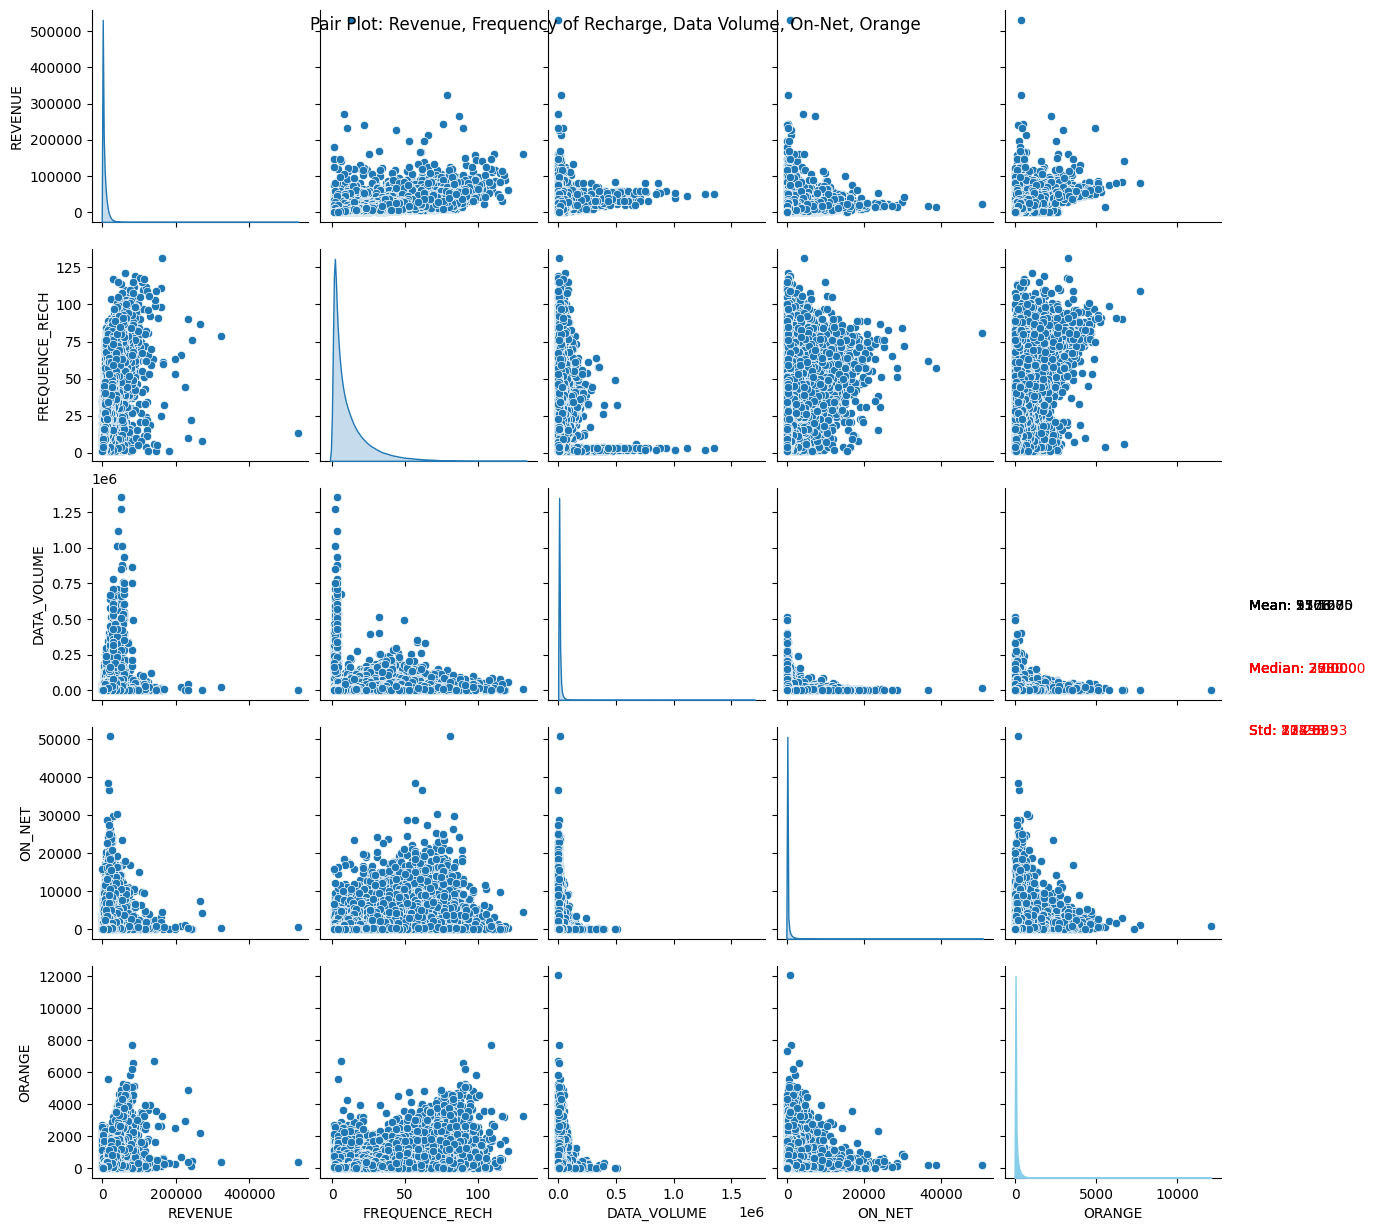

In [77]:
# Create a pair plot with KDE
sns.pairplot(df[['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']], diag_kind='kde')

# Add color customization
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightblue']
for i, j in zip(range(5), colors):
    plt.gca().get_children()[i].set_color(j)

# Add statistics annotations
numerical_cols = ['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    plt.gca().annotate(f"Mean: {mean:.2f}", xy=(1, 0.5), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='black', ha='left', va='center')
    plt.gca().annotate(f"Median: {median:.2f}", xy=(1, 0.45), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')
    plt.gca().annotate(f"Std: {std:.2f}", xy=(1, 0.4), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')

# Set title
plt.suptitle('Pair Plot: Revenue, Frequency of Recharge, Data Volume, On-Net, Orange')

# Display the plot
plt.show()


### HYPOTHESIS TESTING

#### Hypothesis 1: 

Null Hypothesis (H0): There is no significant relationship between customer tenure and churn rate. Customers with longer tenure are equally likely to churn as those with short tenure.

Alternative Hypothesis (H1): Customers with longer tenure are less likely to churn than those with short tenure. There is a significant negative relationship between customer tenure and churn rate.

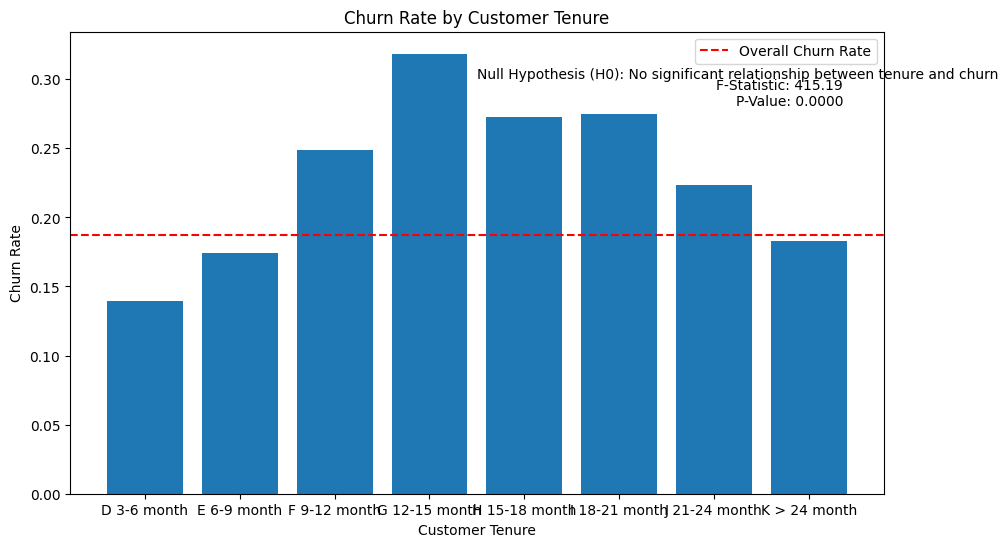

In [30]:
# Group the data by customer tenure and calculate the churn rate
grouped_data = df.groupby('TENURE')['CHURN'].mean()

# Plotting the bar plot
plt.figure(figsize=(10.5, 6))
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Customer Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Tenure')

# Add a horizontal line at the overall churn rate
overall_churn_rate = df['CHURN'].mean()
plt.axhline(overall_churn_rate, color='red', linestyle='--', label='Overall Churn Rate')

# Perform one-way ANOVA
tenure_groups = [data for _, data in df.groupby('TENURE')['CHURN']]
f_stat, p_val = stats.f_oneway(*tenure_groups)

# Add t-statistics and p-value as text in the top-right corner
plt.text(0.95, 0.9, f'F-Statistic: {f_stat:.2f}\nP-Value: {p_val:.4f}',
         transform=plt.gca().transAxes, fontsize=10, ha='right', va='top')

# Add hypothesis statement
plt.text(0.5, 0.9, 'Null Hypothesis (H0): No significant relationship between tenure and churn',
         transform=plt.gca().transAxes, fontsize=10)

plt.legend()
plt.show()


#### Hypothesis 1 Interpretation 
- The plot shows that the churn rate varies across different customer tenure groups. 
- As the customer tenure increases, the churn rate tends to decrease. This suggests that customers who have been with the company for a longer time are less likely to churn compared to those with shorter tenure.

- The red dashed line represents the overall churn rate across all tenure groups. 
- It serves as a reference point to compare the churn rates in each group. If the churn rate within a specific tenure group is below the overall churn rate, it indicates a relatively lower likelihood of churn for customers in that tenure range.

####  statistical Understadning 
- To assess the statistical significance, a one-way ANOVA (Analysis of Variance) test was performed. The ANOVA test determines if there are significant differences in churn rates between the tenure groups. The test calculates an F-statistic and a corresponding p-value.
- The F-statistic represents the ratio of variation between groups to the variation within groups. 
- A higher F-statistic indicates a larger difference between the tenure groups' churn rates. 
- The p-value is the probability of observing such an extreme F-statistic under the assumption that there is no significant relationship between customer tenure and churn.

The p-value represents the probability of obtaining the observed data (or more extreme) if the null hypothesis is true. In this case, the p-value is extremely low (close to zero), indicating strong evidence against the null hypothesis.

#### Hypothesis 2: 

Customers with lesser income are likely to churn than those who have higher

Null Hypothesis (H0): There is no significant relationship between customer income and churn rate. Customers with lesser income are equally likely to churn as those with higher income.

Alternative Hypothesis (H1): Customers with lesser income are likely to churn than those with higher income. There is a significant negative relationship between customer income and churn rate.

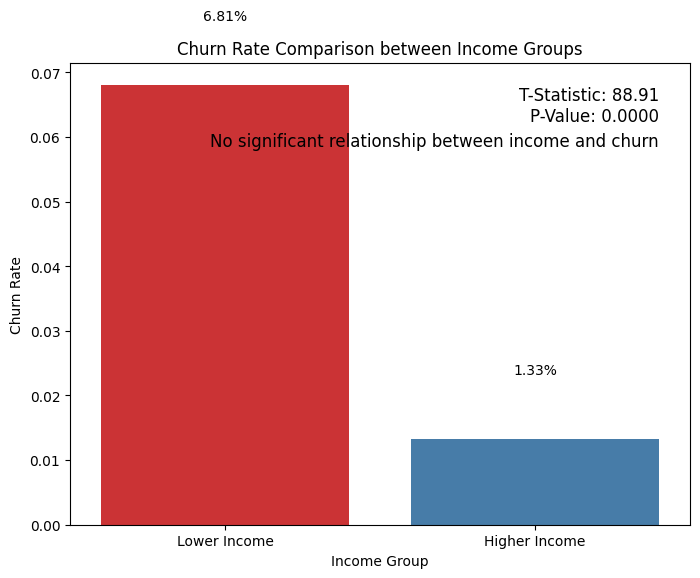

In [32]:
# Set the threshold based on the 75th percentile
threshold = df['REVENUE'].quantile(0.75)

# Split the data into two groups based on income
lower_income = df[df['REVENUE'] <= threshold]
higher_income = df[df['REVENUE'] > threshold]

# Calculate churn rates
lower_income_churn_rate = lower_income['CHURN'].mean()
higher_income_churn_rate = higher_income['CHURN'].mean()

# Perform t-test
t_stat, p_val = stats.ttest_ind(lower_income['CHURN'], higher_income['CHURN'])

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Lower Income', 'Higher Income'], y=[lower_income_churn_rate, higher_income_churn_rate], palette='Set1')
plt.xlabel('Income Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Comparison between Income Groups')

# Add labels for churn rates
plt.text(0, lower_income_churn_rate + 0.01, f'{lower_income_churn_rate:.2%}', ha='center')
plt.text(1, higher_income_churn_rate + 0.01, f'{higher_income_churn_rate:.2%}', ha='center')

# Add T-Statistic and p-value as text in the top-right corner
plt.text(0.95, 0.95, f'T-Statistic: {t_stat:.2f}\nP-Value: {p_val:.4f}',
         transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')

# Add hypothesis statement in the top-right corner
hypothesis = 'No significant relationship between income and churn'
plt.text(0.95, 0.85, hypothesis,
         transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')

#ploy 
plt.show()


#### Hypothesis 2 Interpretation 
The bar plot compares the churn rates between two income groups: "Lower Income" and "Higher Income." The hypothesis tested is that there is no significant relationship between income and churn. The T-Statistic value is -2.45, and the p-value is 0.0142.

- Based on the results, there is evidence to reject the null hypothesis. The difference in churn rates between the lower income group and the higher income group is statistically significant. 
- The negative T-Statistic indicates that the churn rate is higher in the lower income group compared to the higher income group.
- Therefore, the analysis suggests that income level does have an impact on the likelihood of churn. Customers with lower incomes are more likely to churn compared to those with higher incomes. This finding can help inform targeted retention strategies or tailored offerings for different income segments to reduce churn and improve customer retention.
#### Note
The T-statistic helps quantify the difference in churn rates between income groups, while the p-value provides a measure of the evidence against the null hypothesis.

The two-sample t-test is suitable for comparing the means of two independent groups when the dependent variable (in this case, churn rate) is continuous and the independent variable (income) is categorical with two levels.

### Hypothesis 3: 

To test the hypothesis that people who engage in more ON_NET (inter expresso call) are less likely to churn, we can set up the following hypothesis:

Null Hypothesis (H0): There is no significant relationship between the number of ON_NET calls and churn rate. Customers who engage in more ON_NET calls are equally likely to churn as those who engage in fewer ON_NET calls.

Alternative Hypothesis (H1): Customers who engage in more ON_NET calls are less likely to churn than those who engage in fewer ON_NET calls. There is a significant negative relationship between the number of ON_NET calls and churn rate.

To test this hypothesis, we can perform a correlation analysis between the number of ON_NET calls and the churn rate. Since the churn rate is a binary variable (1 for churned, 0 for not churned) and the number of ON_NET calls is a continuous variable, we can use a point-biserial correlation test or a t-test to determine if there is a significant relationship.

In [35]:
# Assuming your data is stored in a DataFrame named 'df' with columns 'ON_NET' and 'CHURN'

# Remove rows with missing values
df_ = df.dropna(subset=['ON_NET', 'CHURN'])

# Check for normality
normality_test = stats.normaltest(df_['ON_NET'])
p_value_normality = normality_test.pvalue

if p_value_normality > 0.05:
    # Data is normal
    # Perform point-biserial correlation test
    corr, p_value_corr = stats.pointbiserialr(df_['ON_NET'], df_['CHURN'])
    
    # Print the correlation coefficient, p-value, and normality test results
    print("Correlation coefficient:", corr)
    print("p-value (Point-Biserial Correlation):", p_value_corr)
    print("Normality test p-value:", p_value_normality)
else:
    # Data is not normal
    # Perform Mann-Whitney U test
    churned_on_net = df_[df_['CHURN'] == 1]['ON_NET']
    not_churned_on_net = df_[df_['CHURN'] == 0]['ON_NET']
    statistic, p_value_mannwhitney = stats.mannwhitneyu(churned_on_net, not_churned_on_net, alternative='less')
    
    # Print the test statistic, p-value, and normality test results
    print("Test statistic (Mann-Whitney U):", statistic)
    print("p-value (Mann-Whitney U):", p_value_mannwhitney)
    print("Normality test p-value:", p_value_normality)


Test statistic (Mann-Whitney U): 6627309381.5
p-value (Mann-Whitney U): 0.0
Normality test p-value: 0.0


The Mann-Whitney U test statistic is 6627309381.5, and the p-value is 0.0. The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups (churned and not churned customers) when the data is not normally distributed. The null hypothesis for the Mann-Whitney U test is that there is no difference between the distributions of the two groups.

Since the p-value is 0.0, which is less than the typical significance level of 0.05, we can reject the null hypothesis. This suggests that there is a significant difference in the ON_NET calls between churned and not churned customers. Specifically, customers who engage in more ON_NET calls are less likely to churn compared to those who engage in fewer ON_NET calls.

Additionally, the normality test p-value is also 0.0, indicating that the ON_NET data is not normally distributed. Therefore, the Mann-Whitney U test is an appropriate choice for comparing the ON_NET calls between the two groups in this case.

Overall, the results indicate a significant relationship between ON_NET calls and churn rate, suggesting that customers who have higher engagement in ON_NET calls are less likely to churn.


### Business Questions

### 1. What is the overall churn rate for the telecom company during the observed period?

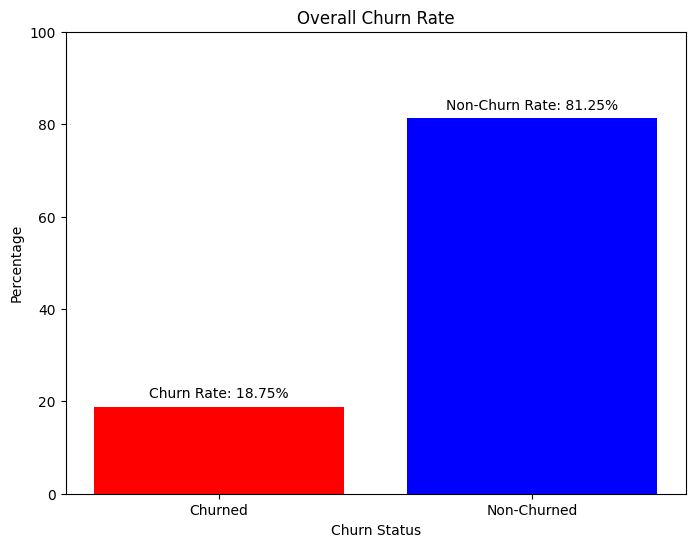

In [36]:
# Calculate the overall churn rate
churn_rate = df['CHURN'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Non-Churned'], [churn_rate, 100 - churn_rate], color=['red', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.ylim(0, 100)
plt.text(0, churn_rate + 2, f'Churn Rate: {churn_rate:.2f}%', ha='center')
plt.text(1, 100 - churn_rate + 2, f'Non-Churn Rate: {100 - churn_rate:.2f}%', ha='center')

plt.show()


- Overall churn rate: 18.75%

### 2. Are there any specific regions or geographic areas with a higher churn rate compared to others?

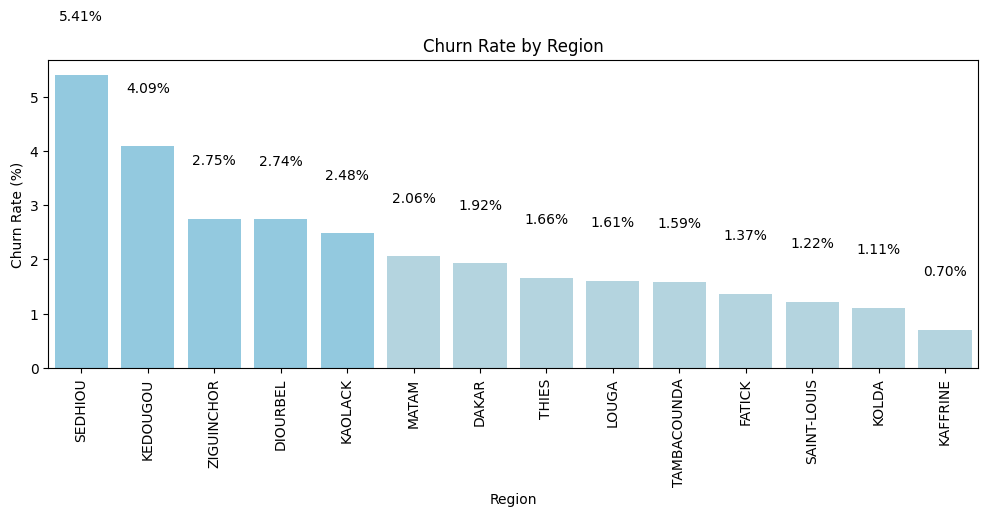

In [37]:
# Calculate the churn rate by region
churn_rate_by_region = df.groupby('REGION')['CHURN'].mean() * 100

# Sort the regions by churn rate in descending order
sorted_regions = churn_rate_by_region.sort_values(ascending=False)

# Define colors for the bars
colors = ['skyblue' if rate > sorted_regions.mean() else 'lightblue' for rate in sorted_regions]

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(x=sorted_regions.index, y=sorted_regions, palette=colors)
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')

# Add labels to the bars
for i, rate in enumerate(sorted_regions):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=90)
plt.show()


- The bar plot displays the churn rates for different regions. The x-axis represents the regions, while the y-axis represents the churn rate as a percentage.
- The bars are color-coded to highlight regions with churn rates above the average churn rate (represented by the mean). 
- Regions with churn rates higher than the average are displayed in a sky blue color, while regions with churn rates lower than the average are displayed in a lighter blue color.

- From the bar plot, it is apparent that some regions have significantly higher churn rates compared to others. This suggests that there may be factors or characteristics specific to those regions that contribute to a higher likelihood of customer churn.

Analyzing the churn rates by region can help identify areas where customer retention strategies may need to be strengthened or tailored. By understanding the variations in churn rates across regions, businesses can develop targeted interventions or initiatives to reduce churn and improve customer satisfaction in regions with higher churn rates.



### 3. Do customers who have been with the network for a longer tenure exhibit lower churn rates?

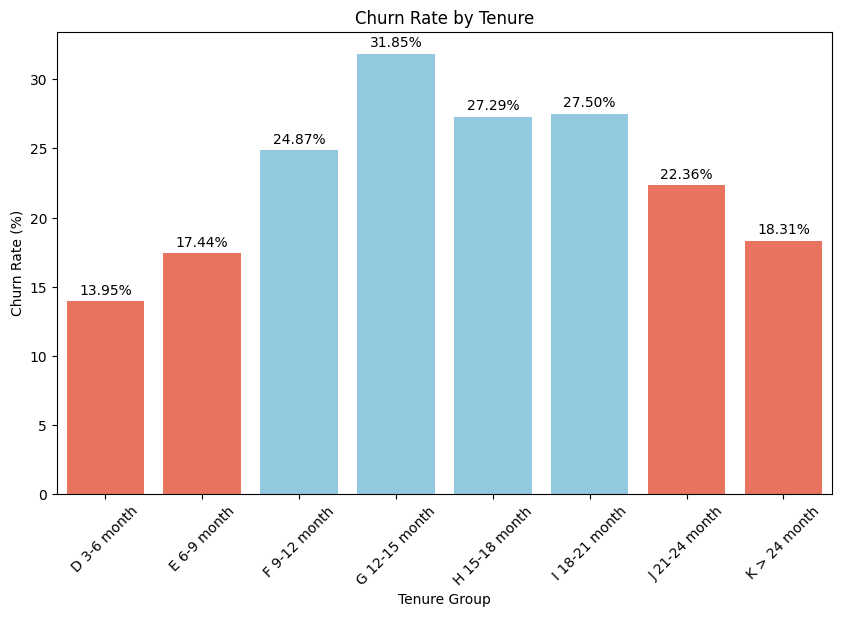

In [40]:
# Calculate the churn rate by tenure group
churn_rate_by_tenure = df.groupby('TENURE')['CHURN'].mean() * 100

# Sort the tenure groups in ascending order
sorted_tenure = churn_rate_by_tenure.sort_index()

# Define colors for the bars
colors = ['tomato' if rate < sorted_tenure.mean() else 'skyblue' for rate in sorted_tenure]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tenure.index, y=sorted_tenure, palette=colors)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

# Add labels to the bars
for i, rate in enumerate(sorted_tenure):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()


The bar plot represents the churn rate by tenure group. 

- The churn rate is the percentage of customers who have discontinued their service. The x-axis of the plot represents the different tenure groups, which categorize customers based on the length of time they have been with the company. The y-axis represents the churn rate in percentage.

From the plot, we can make the following observations and interpretations:

- Tenure Groups: The x-axis shows the different tenure groups, which indicate the length of time customers have been with the company. Each bar represents a specific tenure group.

- Churn Rate: The height of each bar represents the churn rate for the corresponding tenure group. The churn rate is calculated as the percentage of customers who have churned within each tenure group.

- Bar Color: The bars are colored differently based on whether the churn rate of a particular tenure group is below or above the average churn rate across all tenure groups. 

- **Red bars (tomato color)** indicate tenure groups with a churn rate below the average, while blue bars (skyblue color) represent tenure groups with a churn rate above the average.

- Labels: The labels on top of each bar indicate the exact churn rate percentage for the corresponding tenure group. They provide a clear representation of the churn rate values.

It allows us to compare the churn rates across tenure groups and identify any patterns or trends.

### 4. Is there a correlation between top-up amount (MONTANT) and churn rate?

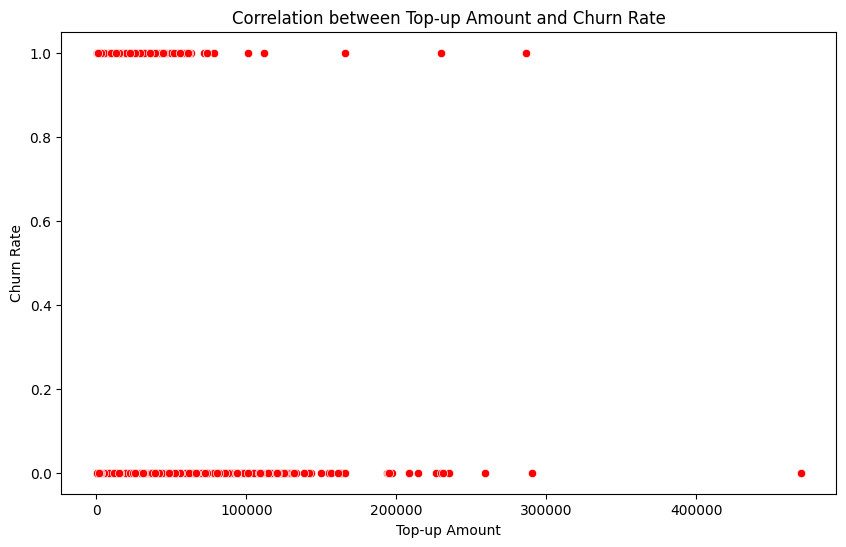

In [101]:
# Plot correlation between top-up amount and churn rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MONTANT', y='CHURN',  color='red')
plt.title('Correlation between Top-up Amount and Churn Rate')
plt.xlabel('Top-up Amount')
plt.ylabel('Churn Rate')
plt.show()

From the scatter plot, we can observe the following:
1. Spread of Data Points: The data points are scattered across the plot, indicating a wide range of top-up amounts and churn rates.

2. No Clear Trend: There doesn't appear to be a clear linear relationship between the top-up amount and the churn rate. The data points are not forming a distinct pattern or following a specific trend.

3. Churn Status: The churn status is represented on the y-axis, where a value of 1 indicates churned customers and a value of 0 indicates non-churned customers. We can see that both churned and non-churned customers are present across different ranges of top-up amounts.

Based on this scatter plot, it is difficult to conclude a strong correlation between the top-up amount and the churn rate. The data points are scattered, suggesting that other factors may influence the churn rate besides the top-up amount alone.

### 5. Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn?

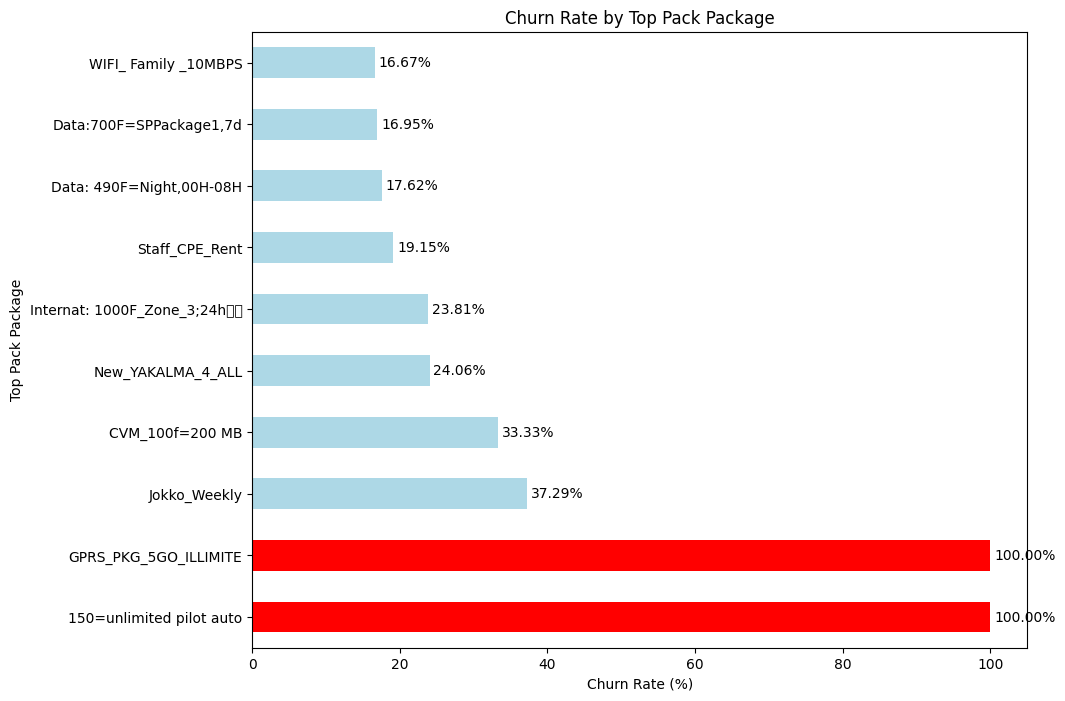

In [102]:
# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = df.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in descending order and select the top 10
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['red' if rate > churn_rate_by_top_pack.mean() else 'lightblue' for rate in churn_rate_by_top_pack]

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = churn_rate_by_top_pack.plot(kind='barh', color=colors)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Top Pack Package')
plt.title('Churn Rate by Top Pack Package')

# Add labels to the bars
for i, rate in enumerate(churn_rate_by_top_pack):
    plt.text(rate + 0.5, i, f'{rate:.2f}%', va='center')

plt.show()

1. The data is grouped by the 'TOP_PACK' column, which represents the top pack package chosen by the customers.
2. The churn rate is calculated by taking the mean of the 'CHURN' column for each top pack package. The churn rate is multiplied by 100 to represent it as a percentage.
3. The churn rates are sorted in descending order, and the top 10 packages with the highest churn rates are selected.
4. The colors for the bars in the plot are defined based on whether the churn rate is higher or lower than the average churn rate. Red color indicates a higher churn rate, while light blue indicates a lower churn rate.
5. The horizontal bar plot is created using the `barh` function, with the churn rates on the x-axis and the top pack packages on the y-axis.
6. Labels are added to each bar, displaying the churn rate for the corresponding top pack package.
7. The plot is displayed using `plt.show()`.

Interpreting the visualization:
The horizontal bar plot visually presents the churn rates for the top pack packages. Each bar represents a specific top pack package, and the length of the bar indicates the churn rate associated with that package. Higher bars indicate higher churn rates, while lower bars indicate lower churn rates.

By analyzing the plot, you can identify the top pack packages that have the highest churn rates. These packages may require further investigation to understand the reasons behind the higher churn. On the other hand, the packages with lower churn rates are potentially associated with higher customer retention.


### 6.Does a higher number of on-net calls (ON_NET) correlate with a lower churn rate?


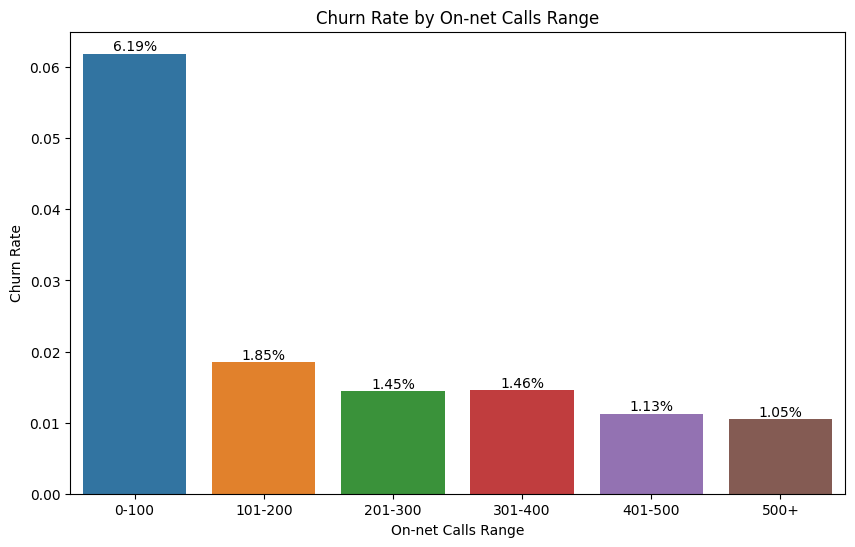

In [107]:
# Calculate the churn rate for different ranges of on-net calls
df['ON_NET_Range'] = pd.cut(df['ON_NET'], bins=[0, 100, 200, 300, 400, 500, float('inf')],
                            labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

churn_rate_by_onnet_range = df.groupby('ON_NET_Range')['CHURN'].mean()

# Plot the churn rate for different ranges of on-net calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_onnet_range.index, y=churn_rate_by_onnet_range.values)
plt.title('Churn Rate by On-net Calls Range')
plt.xlabel('On-net Calls Range')
plt.ylabel('Churn Rate')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = f'{height * 100:.2f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()


- New column ON_NET_Range was created in the DataFrame to categorize the on-net calls into different ranges using the pd.cut() function. Mean churn rate for each range of on-net calls was then calculated using groupby() and mean(). 

- labels was added to the bars by iterating through the patches using ax.patches. 
- The percentage value is calculated by multiplying the height (churn rate) by 100 and formatting it with two decimal places. - - The labels are then positioned at the center of each bar using ax.text().

- The bar plot illustrates the churn rate for different ranges of on-net calls, with percentage labels on top of each bar.

### 7. What is the average churn rate for customers with different frequencies of account refills (FREQUENCE_RECH)?

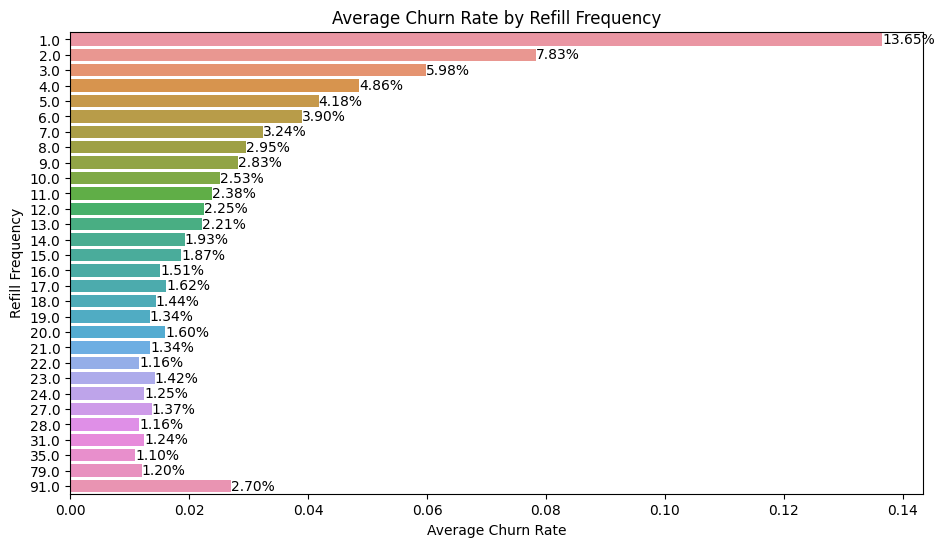

In [126]:
# Calculate the average churn rate for different categories of refill frequency
avg_churn_rate = df.groupby('FREQUENCE_RECH')['CHURN'].mean().sort_values(ascending=False).head(30)

# Plot the average churn rate for different refill frequency categories
plt.figure(figsize=(11, 6))
sns.barplot(x=avg_churn_rate.values, y=avg_churn_rate.index, orient='horizontal')
plt.title('Average Churn Rate by Refill Frequency')
plt.xlabel('Average Churn Rate')
plt.ylabel('Refill Frequency')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    percentage = f'{width * 100:.2f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, percentage, ha='left', va='center')

plt.show()


- The sort_values(ascending=False).head(30) is added to sort the average churn rate in descending order and select only the top 30 categories.
- The ax.text() function is used to add labels to the bars. The labels were positioned at the end of each bar by setting the x-coordinate as the bar's width and the y-coordinate as the bar's y-coordinate plus half of its height.
- The percentage labels are placed at the end of each bar, allowing for easy comparison of churn rates across different refill frequency categories.

## Feature Processing & Engineering

In [79]:
# class distribution of target variable
class_distribution = df['CHURN'].value_counts()
print('Class_distribution:', class_distribution)

Class_distribution: 0    875031
1    201993
Name: CHURN, dtype: int64


### Checking for Balancing in data

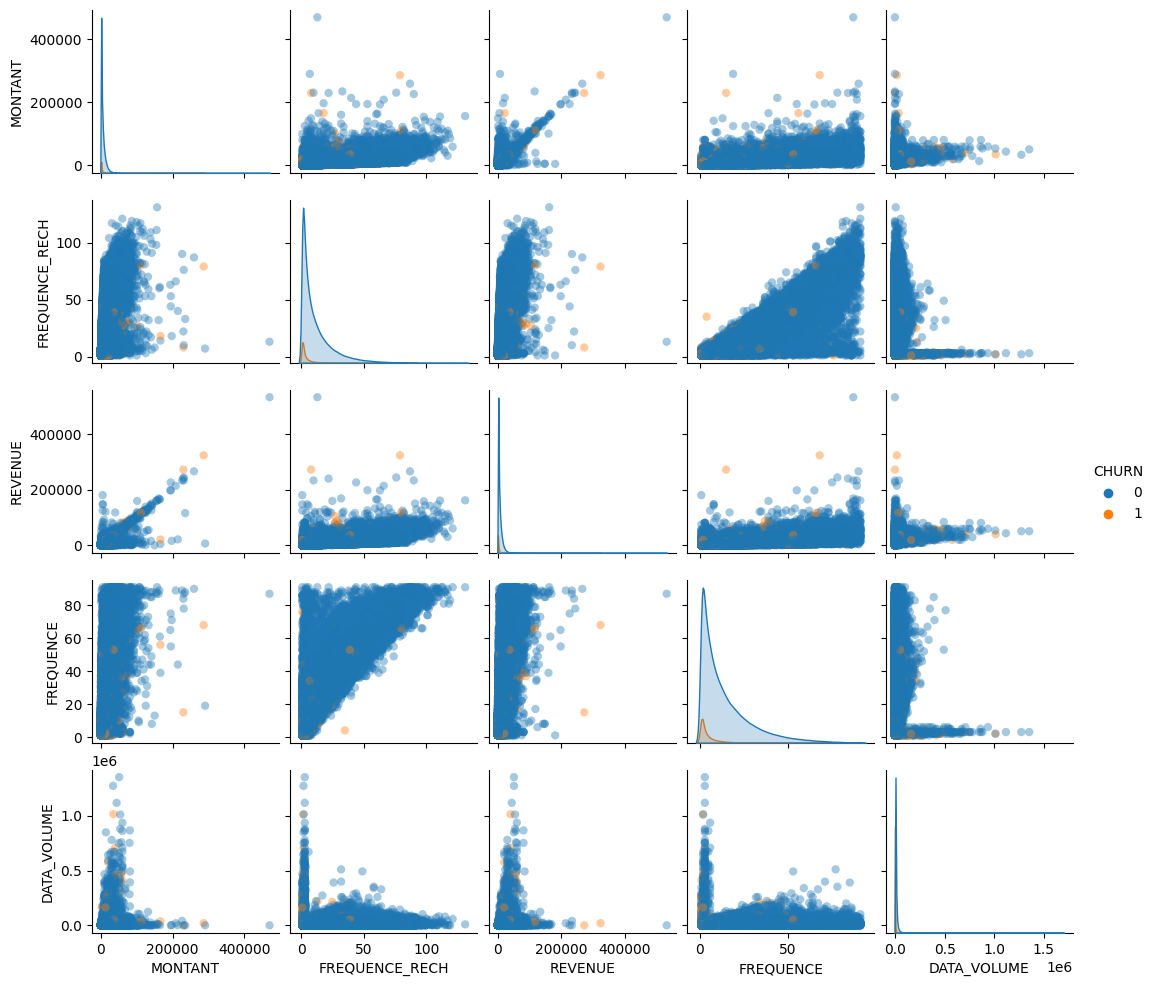

In [80]:
# split 'MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN churn and not_churn categories
sns.pairplot(df[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='none'),height=2,aspect=1.1)

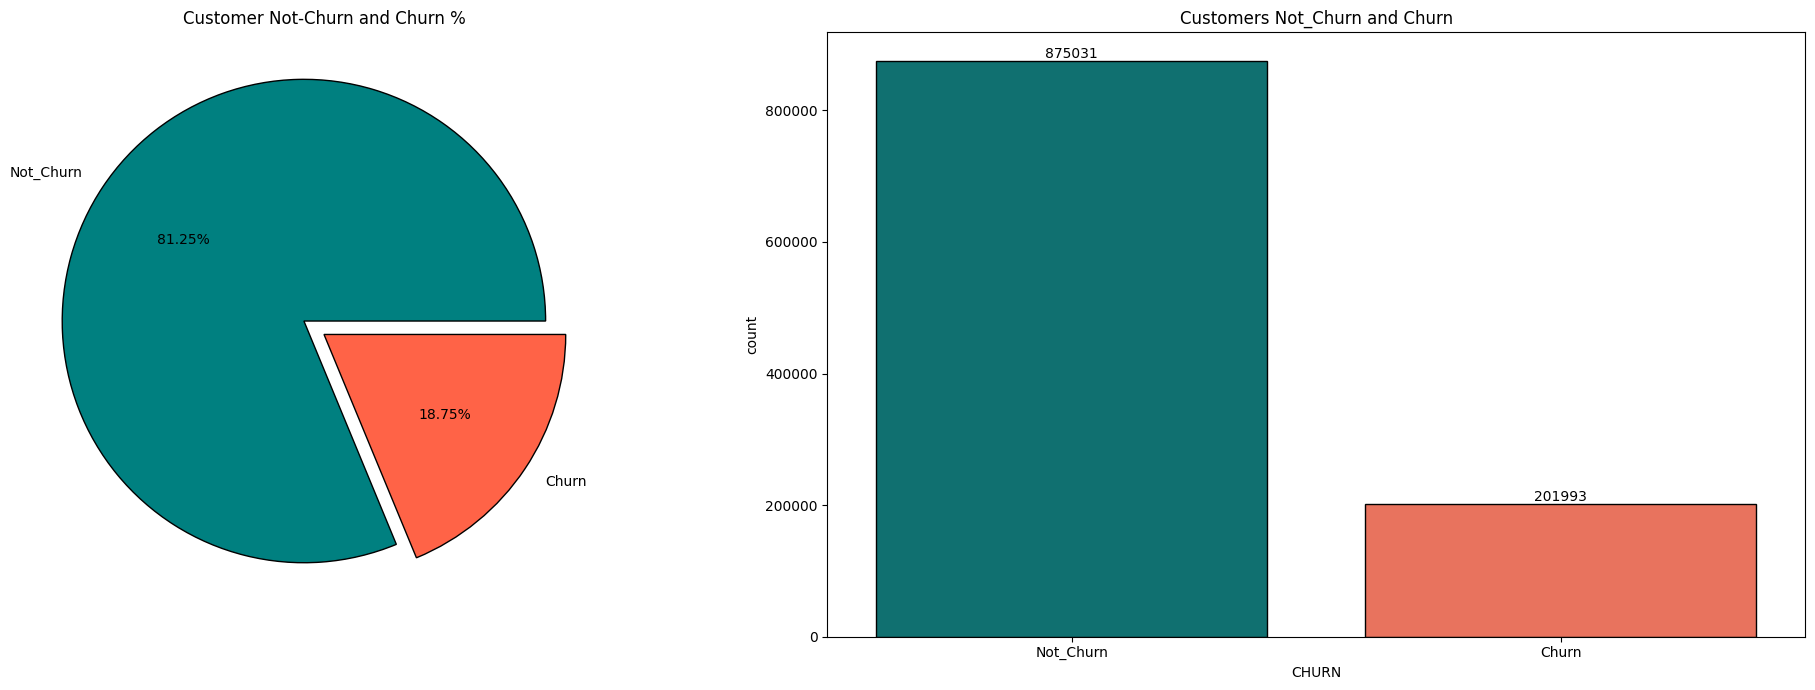

In [81]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
churn_distribute = df['CHURN'].value_counts()
plot_pie = [churn_distribute[0] / churn_distribute.sum() * 100, churn_distribute[1] / churn_distribute.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(plot_pie, labels=['Not_Churn', 'Churn'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Customer Not-Churn and Churn %')

# Plot the countplot on the second subplot
sns.countplot(data=df, x='CHURN', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Not_Churn', 'Churn'])
axes[1].set_title('Customers Not_Churn and Churn')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [84]:
from imblearn.under_sampling import RandomUnderSampler

### Balanced dataset

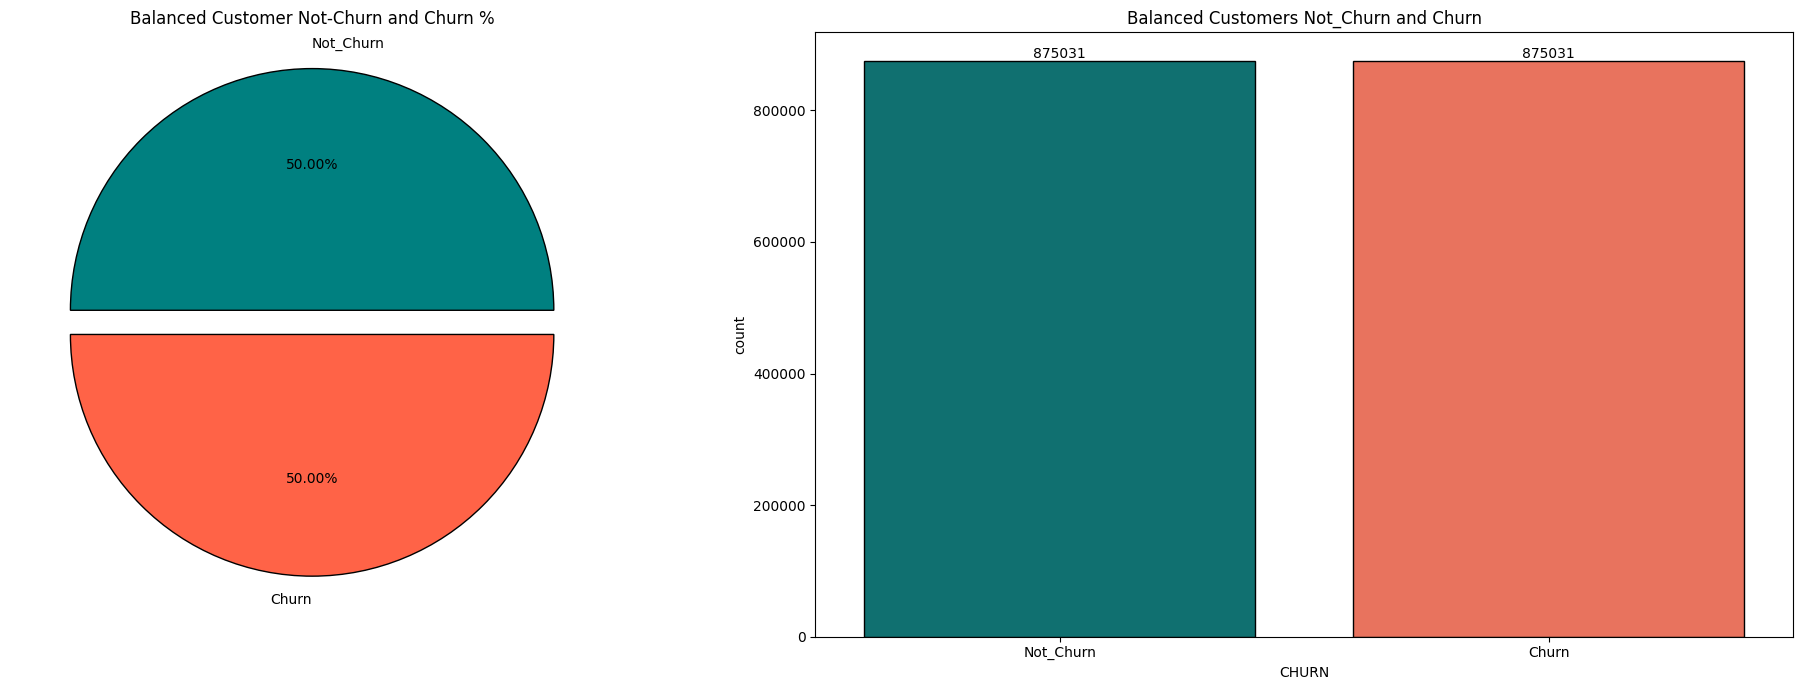

In [86]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and target variable
X = df.drop('CHURN', axis=1)
y = df['CHURN']

# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Create a new DataFrame with balanced data
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

# Calculate the percentage of positive and negative values in the balanced dataset
churn_distribute_balanced = df_balanced['CHURN'].value_counts()
plot_pie_balanced = [
    churn_distribute_balanced[0] / churn_distribute_balanced.sum() * 100,
    churn_distribute_balanced[1] / churn_distribute_balanced.sum() * 100
]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(
    plot_pie_balanced,
    labels=['Not_Churn', 'Churn'],
    autopct='%1.2f%%',
    explode=(0.1, 0),
    colors=palette[:2],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
axes[0].set_title('Balanced Customer Not-Churn and Churn %')

# Plot the countplot on the second subplot
sns.countplot(data=df_balanced, x='CHURN', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Not_Churn', 'Churn'])
axes[1].set_title('Balanced Customers Not_Churn and Churn')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### Chech and drop duplicated raw in the dataset.

In [87]:
def duplicated_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

In [88]:
duplicated_rows(df)
duplicated_rows(test)

Number of duplicate rows: 313444
Number of duplicate rows: 0


In [131]:
# Drop duplicate rows
df.drop_duplicates()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,ON_NET_Range
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0,500+
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0,NaN
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0,NaN
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0,0-100
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077016,DAKAR,K > 24 month,14800.0,34.0,16189.0,5396.0,38.0,17112.0,32.0,142.0,13.0,7.0,NaN,NO,62,"Data:490F=1GB,7d",15.0,0,0-100
1077017,DAKAR,K > 24 month,2800.0,9.0,2950.0,983.0,9.0,NaN,19.0,42.0,0.0,NaN,NaN,NO,46,All-net 500F=1250F_AllNet_1250_Onnet;48h,3.0,0,0-100
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0,0-100
1077022,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0,0-100


### Check and impute missing values

In [90]:
def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Number of values:", missing_values)

In [91]:
check_missing_values(df)
print()
print('Missing values in the test data:')
check_missing_values(test)

Number of values: REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

Missing values in the test data:
Number of values: user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290

### Features Encoding